# i. Perkenalan

Nama : Akbar Fitriawan  
Batch : HCK-14

Dataset tentang informasi penggunaan kartu kredit selama 6 bulan

#### Conceptual Problems

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?
2. Jelaskan yang dimaksud dengan Elbow Method alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll

Jawab:
* Inertia adalah matrics untuk evaluasi cluster yang di hasilkan dengan cara mengukur jumlah kuadrat jarak antara setiap sample dan pusat cluster terdekat.
* Elbow Methode adalah teknik untuk menentukan jumlah optimal dari cluster.  
    alasan menggunkan elbow method memberikan gambaran awal untuk menentukan jumlah klsater
    cara penggunaan:
    - Pertama, mengenali WCSS.
    - Hitung nilai inertia untuk setiap konfigurasi klaster.
    - Plot nilai inertia terhadap jumlah klaster.
    - Identifikasi titik di mana penurunan inertia mulai melambat, membentuk pola siku.
    - Jumlah klaster di titik "siku" ini dianggap sebagai jumlah optimal klaster.

    Kelebihan Metode Elbow:

    - Sederhana: Metode Elbow mudah dimengerti dan diimplementasikan.
    - Visual: Plot inertia terhadap jumlah klaster memberikan gambaran visual yang jelas tentang penurunan inertia seiring dengan penambahan klaster.
    - Metode Elbow memberikan panduan awal yang baik dalam menentukan jumlah klaster.

    Kelemahan Metode Elbow:

    - Subjektif: Identifikasi titik "siku" dalam plot bisa sedikit subjektif tergantung pada data dan distribusinya.
    - Tidak Selalu Optimal: Metode Elbow tidak selalu menghasilkan jumlah klaster yang optimal, terutama ketika distribusi data tidak memiliki pola yang jelas seperti "siku".
    - Bergantung pada Data: Keberhasilan Metode Elbow sangat tergantung pada data yang digunakan dan metrik yang dipilih (seperti inertia).

# ii. Query SQL

In [1]:
# Koneksi dataset bigquery
# from google.colab import auth
# from google.cloud import bigquery
# auth.authenticate_user()
# print('Authenticated')

# project_id = "lively-metrics-415004"
# client = bigquery.Client(project=project_id)

In [2]:
# install feature_engine
# !pip install feature_engine

In [3]:
# !pip install --upgrade pandas

# iii. Import libraries

In [4]:
# library dataframe
import pandas as pd
# library olah data numerical
import numpy as np
# library statistik
from scipy import stats


# Data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing data
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


# model clustering
from sklearn.cluster import KMeans

# Library handling outlier
from feature_engine.outliers import Winsorizer
# library statistik
from scipy.stats import pearsonr, kendalltau, spearmanr

# Save model
import pickle



# iv. Data loading

In [5]:
# # query data dari
# df = client.query('''

# SELECT *

# FROM `ftds-hacktiv8-project.phase1_ftds_014_hck.credit-card-information`
# WHERE
#   MOD(CUST_ID, 2) = 0;

# ''').to_dataframe()

In [6]:
# df

In [7]:
# df.head(10)

In [8]:
# df.tail(10)

### Save DataFrame

In [9]:
# df.to_csv('P1G6_Set_1_akbar_fitriawan.csv', index=False)

### Read Dataframe

In [10]:
df = pd.read_csv('P1G6_Set_1_akbar_fitriawan.csv')

# membuat kolom menjadi lower case
df.columns = df.columns.str.lower()
df.head()

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0      788    16.581535              0.125      200.0               0.0   
1     1902   943.584041              0.875      103.0             103.0   
2     2322     1.979916              0.125       80.0              80.0   
3     3426   461.455720              1.000      585.0             585.0   
4     3976  1053.594730              1.000     1450.0            1450.0   

   installments_purchases  cash_advance  purchases_frequency  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   

     payments  minimum_payments  prc_full_payment  tenure  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8

# v. Exploratory Data Analysis (EDA)

#### Info Data

In [11]:
print(f'Jumlah Baris : {df.shape[0]}')
print(f'Jumlah kolom : {df.shape[1]}')

Jumlah Baris : 4475
Jumlah kolom : 18


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           4475 non-null   int64  
 1   balance                           4475 non-null   float64
 2   balance_frequency                 4475 non-null   float64
 3   purchases                         4475 non-null   float64
 4   oneoff_purchases                  4475 non-null   float64
 5   installments_purchases            4475 non-null   float64
 6   cash_advance                      4475 non-null   float64
 7   purchases_frequency               4475 non-null   float64
 8   oneoff_purchases_frequency        4475 non-null   float64
 9   purchases_installments_frequency  4475 non-null   float64
 10  cash_advance_frequency            4475 non-null   float64
 11  cash_advance_trx                  4475 non-null   int64  
 12  purcha

*Note:* drop Cust ID karena tidak ada informasi yang di perlukan

In [13]:
df.drop(columns=['cust_id'],axis=1,inplace=True)

#### Statistik Data

In [14]:
df.describe().T

count         mean          std  \
balance                           4475.0  1565.743939  2091.205727   
balance_frequency                 4475.0     0.877608     0.235604   
purchases                         4475.0  1003.158324  2210.812899   
oneoff_purchases                  4475.0   588.504849  1666.500287   
installments_purchases            4475.0   415.025075   927.360842   
cash_advance                      4475.0   973.453671  2133.464502   
purchases_frequency               4475.0     0.490122     0.399874   
oneoff_purchases_frequency        4475.0     0.202614     0.298502   
purchases_installments_frequency  4475.0     0.364989     0.397336   
cash_advance_frequency            4475.0     0.134156     0.199221   
cash_advance_trx                  4475.0     3.196425     6.500169   
purchases_trx                     4475.0    14.490503    24.156038   
credit_limit                      4474.0  4494.020175  3668.535689   
payments                          4475.0  1726.212274  2961.258570   
minimum_payments                  4317.0   854.429538  2306.411178   
prc_full_payment                  4475.0     0.157206     0.295869   
tenure                            4475.0    11.516425     1.347819   

                                         min          25%          50%  \
balance                             0.000000   132.536353   874.905296   
balance_frequency                   0.000000     0.888889     1.000000   
purchases                           0.000000    40.065000   362.480000   
oneoff_purchases                    0.000000     0.000000    29.990000   
installments_purchases              0.000000     0.000000    89.450000   
cash_advance                        0.000000     0.000000     0.000000   
purchases_frequency                 0.000000     0.083333     0.500000   
oneoff_purchases_frequency          0.000000     0.000000     0.083333   
purchases_installments_frequency    0.000000     0.000000     0.166667   
cash_advance_frequency              0.000000     0.000000     0.000000   
cash_advance_trx                    0.000000     0.000000     0.000000   
purchases_trx                       0.000000     1.000000     7.000000   
credit_limit                      150.000000  1500.000000  3000.000000   
payments                            0.000000   390.206371   831.048408   
minimum_payments                    0.037744   169.814310   309.854995   
prc_full_payment                    0.000000     0.000000     0.000000   
tenure                              6.000000    12.000000    12.000000   

                                          75%           max  
balance                           2058.519163  19043.138560  
balance_frequency                    1.000000      1.000000  
purchases                         1122.640000  49039.570000  
oneoff_purchases                   580.320000  40761.250000  
installments_purchases             484.255000  22500.000000  
cash_advance                      1098.569962  29282.109150  
purchases_frequency                  0.916667      1.000000  
oneoff_purchases_frequency           0.333333      1.000000  
purchases_installments_frequency     0.750000      1.000000  
cash_advance_frequency               0.181818      1.166667  
cash_advance_trx                     4.000000    110.000000  
purchases_trx                       17.000000    358.000000  
credit_limit                      6000.000000  30000.000000  
payments                          1895.959003  46930.598240  
minimum_payments                   830.395060  61031.618600  
prc_full_payment                     0.166667      1.000000  
tenure                              12.000000     12.000000

Dilihat dari data angka memiliki perbandingan sehingga harus di scaling. untuk data seperti frekuensi saya asumsikan 0-1 adalah skala bisa berupa dalam persen.

#### Check Cardinality

In [15]:
df.nunique().sort_values(ascending=False)

balance                             4439
payments                            4350
minimum_payments                    4317
purchases                           3218
installments_purchases              2357
cash_advance                        2155
oneoff_purchases                    2073
credit_limit                         153
purchases_trx                        147
cash_advance_trx                      55
prc_full_payment                      47
purchases_installments_frequency      47
purchases_frequency                   47
cash_advance_frequency                46
oneoff_purchases_frequency            44
balance_frequency                     42
tenure                                 7
dtype: int64

untuk data Tenure adalah Jangka waktu layanan kartu kredit pengguna bisa jadi diskrit atau kontinu. saya anggap diskrit

#### Cek Distribusi Data

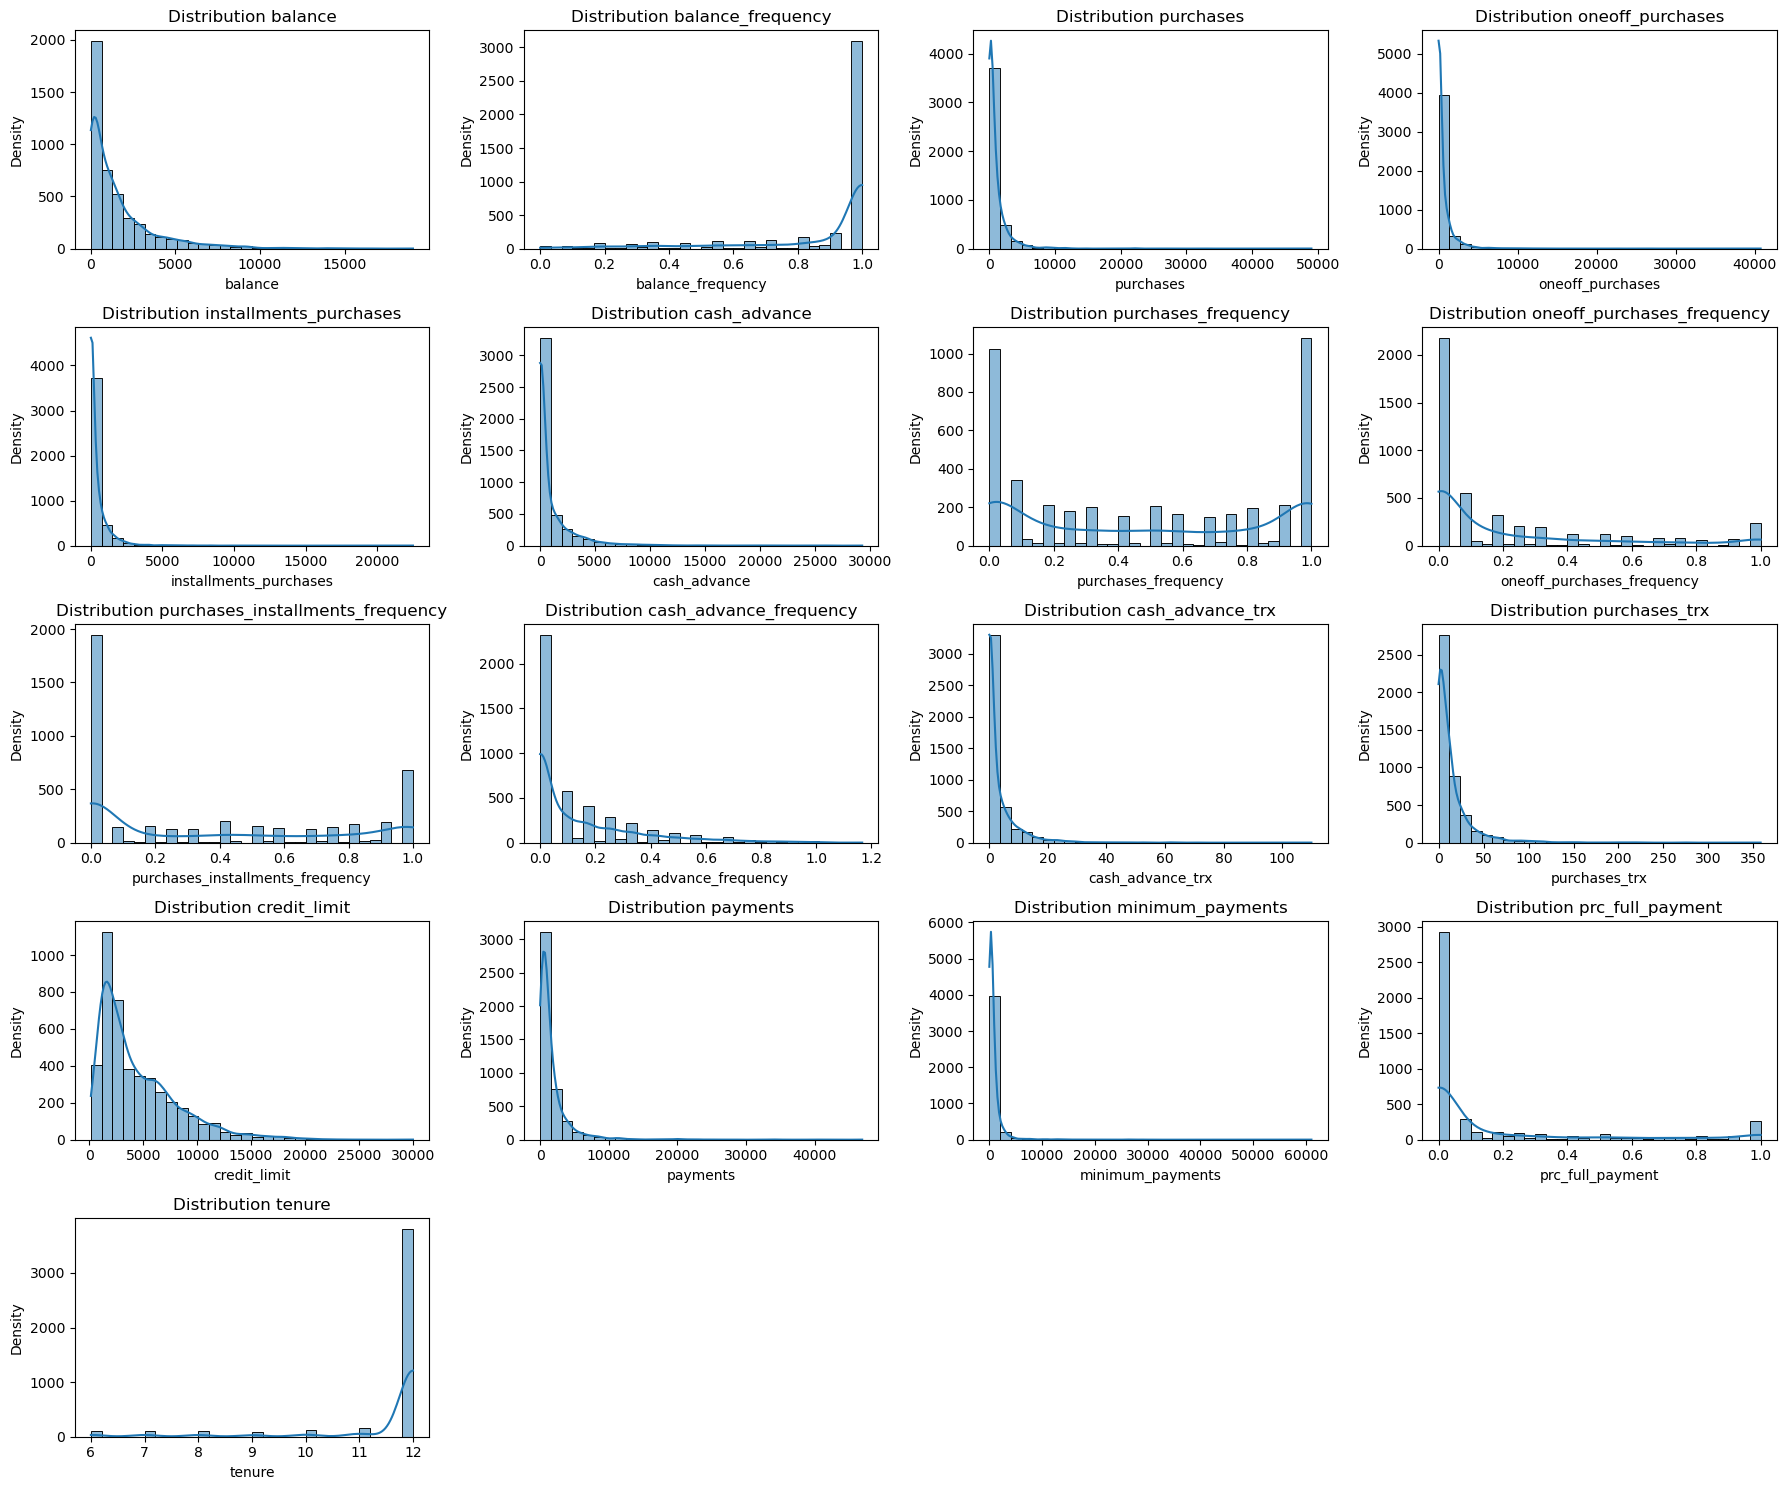

In [16]:
# Membuat subplot grid untuk histogram
fig, axes = plt.subplots(5, 4, figsize=(18, 15))

# Flatten axes array
axes = axes.flatten()

# plot di setiap kolom
for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], bins=30,kde=True)  # membuat histogram dengan kernel density estimate
    axes[i].set_title(f'Distribution {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# hapus figure
for j in range(len(df.columns), len(axes)):
    axes[j].remove()

# display
plt.tight_layout()
plt.show()

Dari data di atas kebayakan fraq tinggi di 0. untuk data yang fraquency dapat di reperntasikan sebagai kecenderungan customer dalam penggunaan dan pemabayaran credit.


In [17]:
tenure = df['tenure'].value_counts()
tenure

tenure
12    3807
11     166
10     114
6      103
7      100
8       97
9       88
Name: count, dtype: int64

In [18]:
purchess_by_tenure = df.groupby(['tenure'])['purchases'].mean().sort_values(ascending=False).reset_index()

purchess_by_tenure

tenure    purchases
0      12  1089.702270
1      11   597.291024
2      10   536.483860
3       9   515.425568
4       8   477.973299
5       7   470.298300
6       6   403.658252

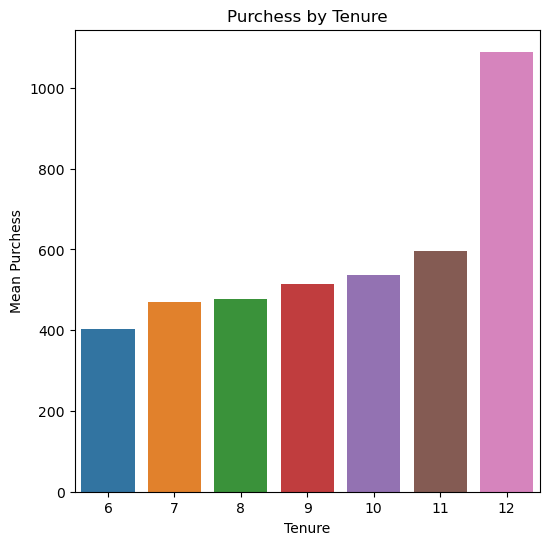

In [19]:
# Membuat plot menggunakan Seaborn
plt.figure(figsize=(6,6)) 
sns.barplot(x=purchess_by_tenure['tenure'], y=purchess_by_tenure['purchases'])
plt.title('Purchess by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Mean Purchess')
plt.show()

In [20]:
mean_balance_by_tunere = df.groupby(['tenure'])['balance'].mean().sort_values(ascending=False).reset_index()
mean_balance_by_tunere

tenure      balance
0      12  1625.155562
1      11  1561.950662
2      10  1264.505695
3       6  1159.367496
4       7  1070.380474
5       8  1067.922906
6       9   980.204778

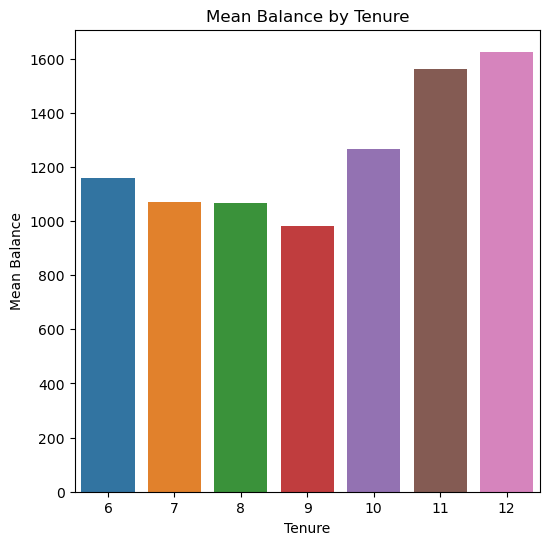

In [21]:
# Barplot untuk rata-rata dari Balance berdasrkan Tenure
plt.figure(figsize=(6,6))
sns.barplot(x='tenure', y='balance', data=mean_balance_by_tunere)
plt.title('Mean Balance by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Mean Balance')



plt.show()

In [22]:
pay_by_tunure = df.groupby(['tenure'])['payments'].mean().sort_values(ascending=False).reset_index()
pay_by_tunure

tenure     payments
0      12  1851.911997
1      11  1295.021076
2       7  1085.769804
3      10  1022.588284
4       9  1003.566793
5       8   761.959760
6       6   701.178985

Text(0, 0.5, 'Mean Payments')

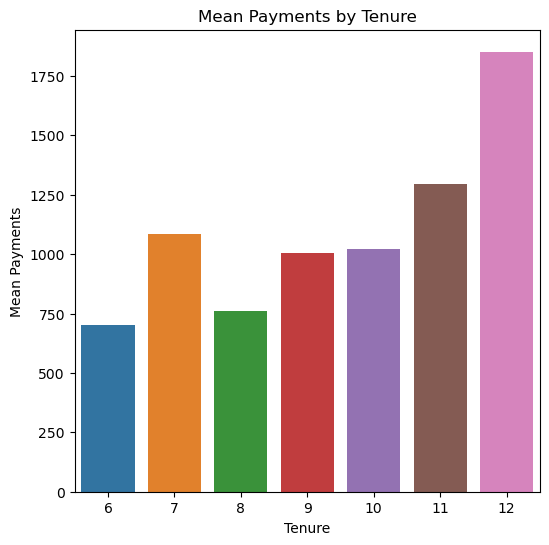

In [23]:
# Membuat barplot menggunakan Seaborn
plt.figure(figsize=(6,6))
sns.barplot(x='tenure', y='payments', data=pay_by_tunure)
plt.title('Mean Payments by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Mean Payments')

---
**Kesimpulan**

- Data kartu kredit memiliki density kebanyakan 0 saya asumsikan bahwa jumlah pemakaian yang rendah
- Untuk grouping dengan data TENURE dari PURCHESS,PAYMENTS,dan Balance distribusi tinggi di bulan 12


# vi. Feature Engineering

#### Check Missing Value

In [24]:
df.isnull().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    158
prc_full_payment                      0
tenure                                0
dtype: int64

<Axes: >

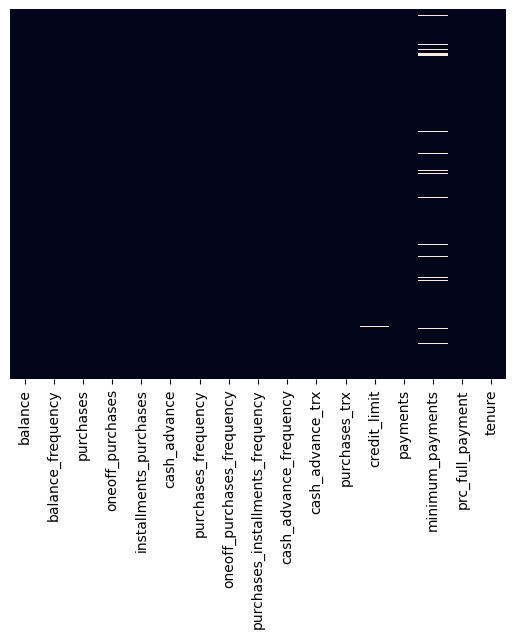

In [25]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False)

Data memiliki Nilai NaN di kolom minimum payments 158 dan credit limit 1, saya asumsikan data hilang termasuk MCAR yang mana data tersebut tidak terinput atau tidak membayar minimum

In [26]:
df = df.dropna()

#### Check Data duplikat

In [27]:
df.duplicated().sum()

0

#### Check Outlier

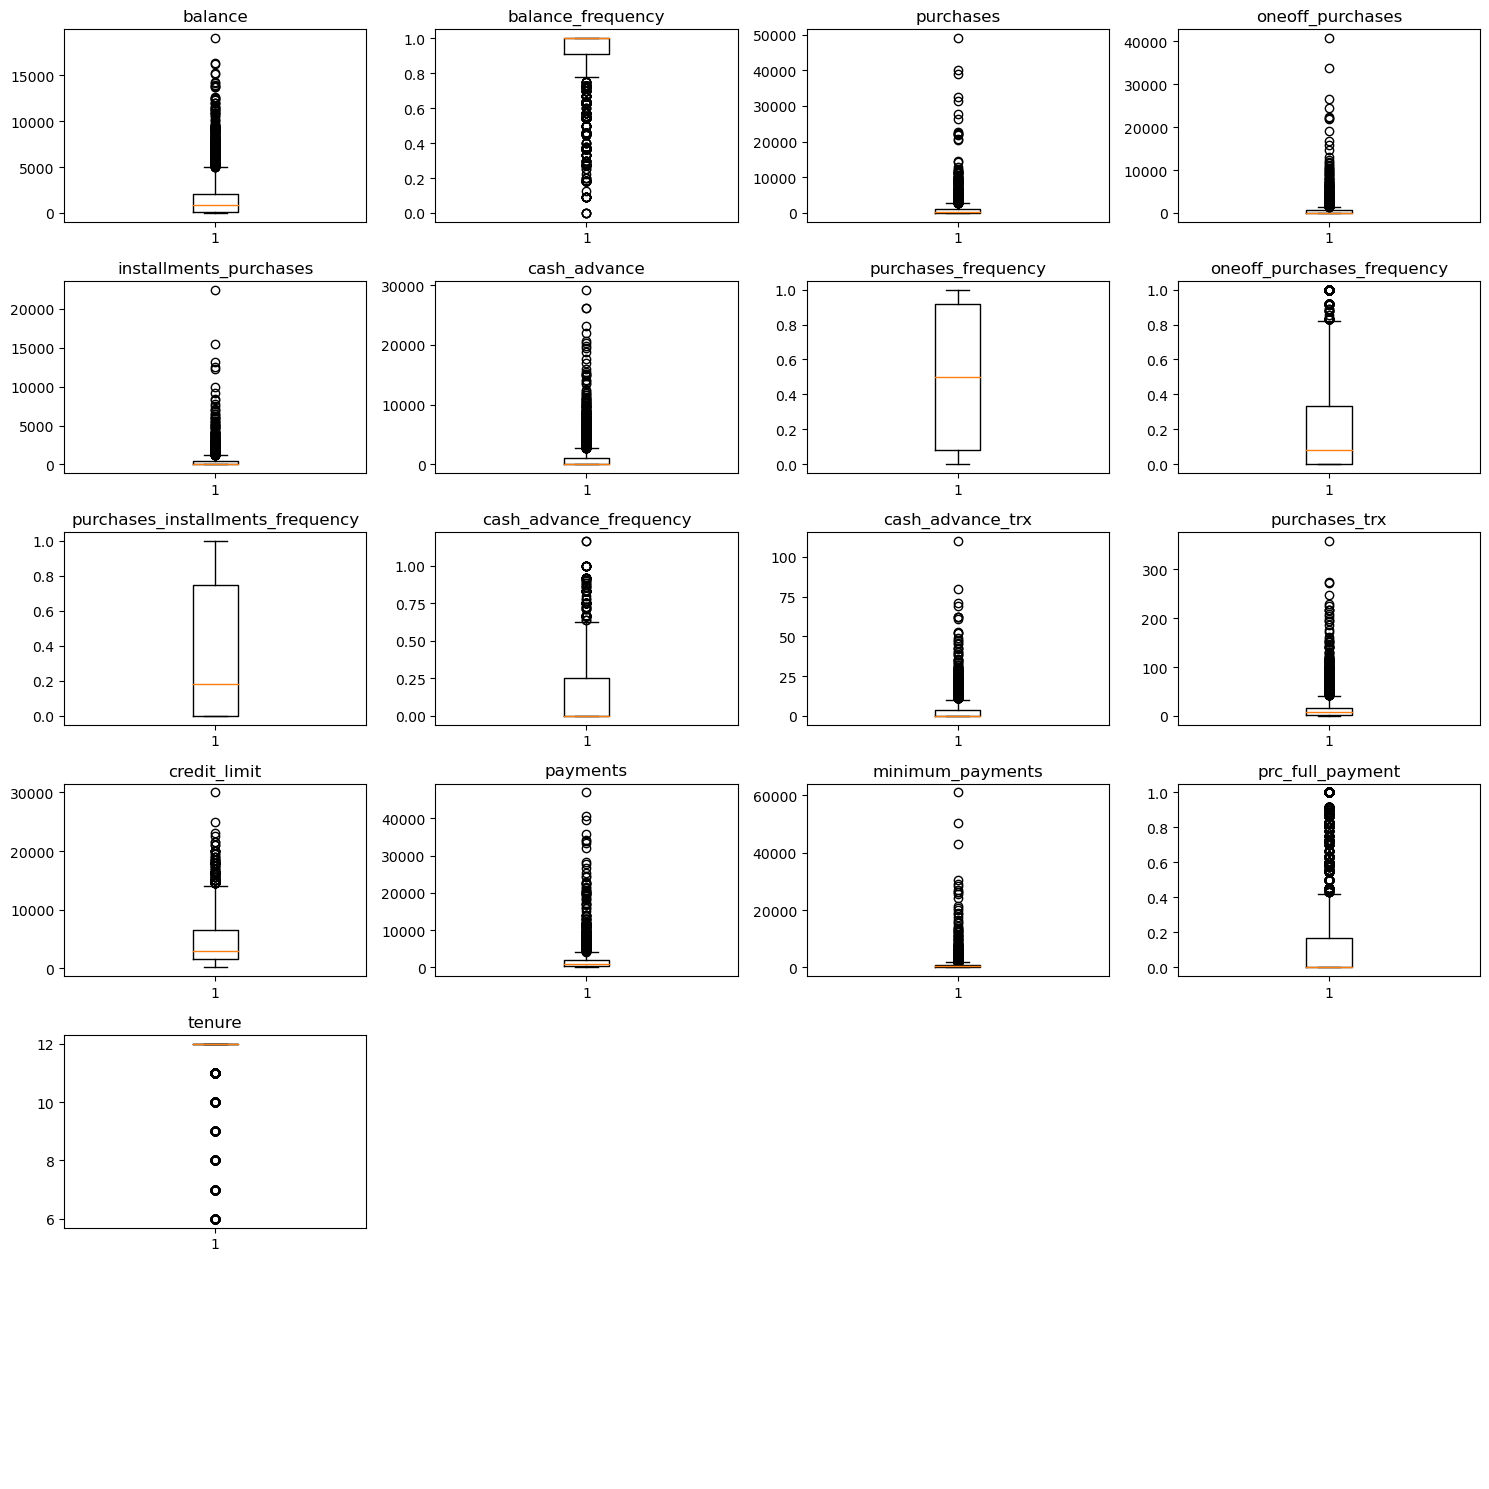

In [28]:
# plot figure
fig, axes = plt.subplots(6, 4, figsize=(15, 15))
axes = axes.flatten()
# membuat boxplot
for i, column in enumerate(df.columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

# hapus plot kosong
for j in range(len(df.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
# show plot
plt.show()

In [29]:

# Making data and columns for normal distribution
data_numerik_normal = []
kolom_numerik_normal = []

# Making data and columns for skewed distribution
data_numerik_skewed = []
kolom_numerik_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for kolom in df.columns:
    skewness = df[kolom].skew()
    
    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        kolom_numerik_normal.append(kolom)
        data_numerik_normal.append([kolom, skewness])
        
    # Elif the data is skewed
    elif skewness < -0.5 or skewness > 0.5:
        kolom_numerik_skewed.append(kolom)
        data_numerik_skewed.append([kolom, skewness])

In [30]:
# Tampilkan data normal
pd.DataFrame(data=data_numerik_normal, columns=['kolom_terdistribusi_normal', 'skewness'])

kolom_terdistribusi_normal  skewness
0               purchases_frequency  0.035642
1  purchases_installments_frequency  0.486577

In [31]:
# Tampilkan data skew
pd.DataFrame(data=data_numerik_skewed, columns=['kolom_skewed', 'skewness'])

kolom_skewed   skewness
0                      balance   2.440901
1            balance_frequency  -2.083168
2                    purchases   8.902272
3             oneoff_purchases  10.045515
4       installments_purchases   8.030305
5                 cash_advance   4.713175
6   oneoff_purchases_frequency   1.494505
7       cash_advance_frequency   1.788835
8             cash_advance_trx   4.722877
9                purchases_trx   4.429897
10                credit_limit   1.525379
11                    payments   5.987445
12            minimum_payments  12.356758
13            prc_full_payment   1.854400
14                      tenure  -2.996978

In [32]:
# Input low variation columns into variable
kolom_low_variation = ['tenure']

# Drop the low variation columns in skewed columns, and add it into normal distribution columns
for kolom in kolom_low_variation:
    kolom_numerik_skewed.remove(kolom) #-> removing low variation columns in skewed columns
    kolom_numerik_normal.append(kolom) #-> appending low variation columns in normal distributed columns

In [33]:
# Capping Method for Normal Distribution  
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=kolom_numerik_normal,
                            missing_values='ignore')

# Fit & Transforming df
df_capped = winsorizer_normal_dist.fit_transform(df)

In [34]:
# Capping Method for Normal Distribution  
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=kolom_low_variation,
                            missing_values='ignore')

# Fit & Transforming X_train 
df_capped = winsorizer_normal_dist.fit_transform(df)

In [35]:
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=kolom_numerik_skewed,
                            missing_values='ignore')

# Fit & Transforming X_train 
df_capped = winsorizer_skewed.fit_transform(df)

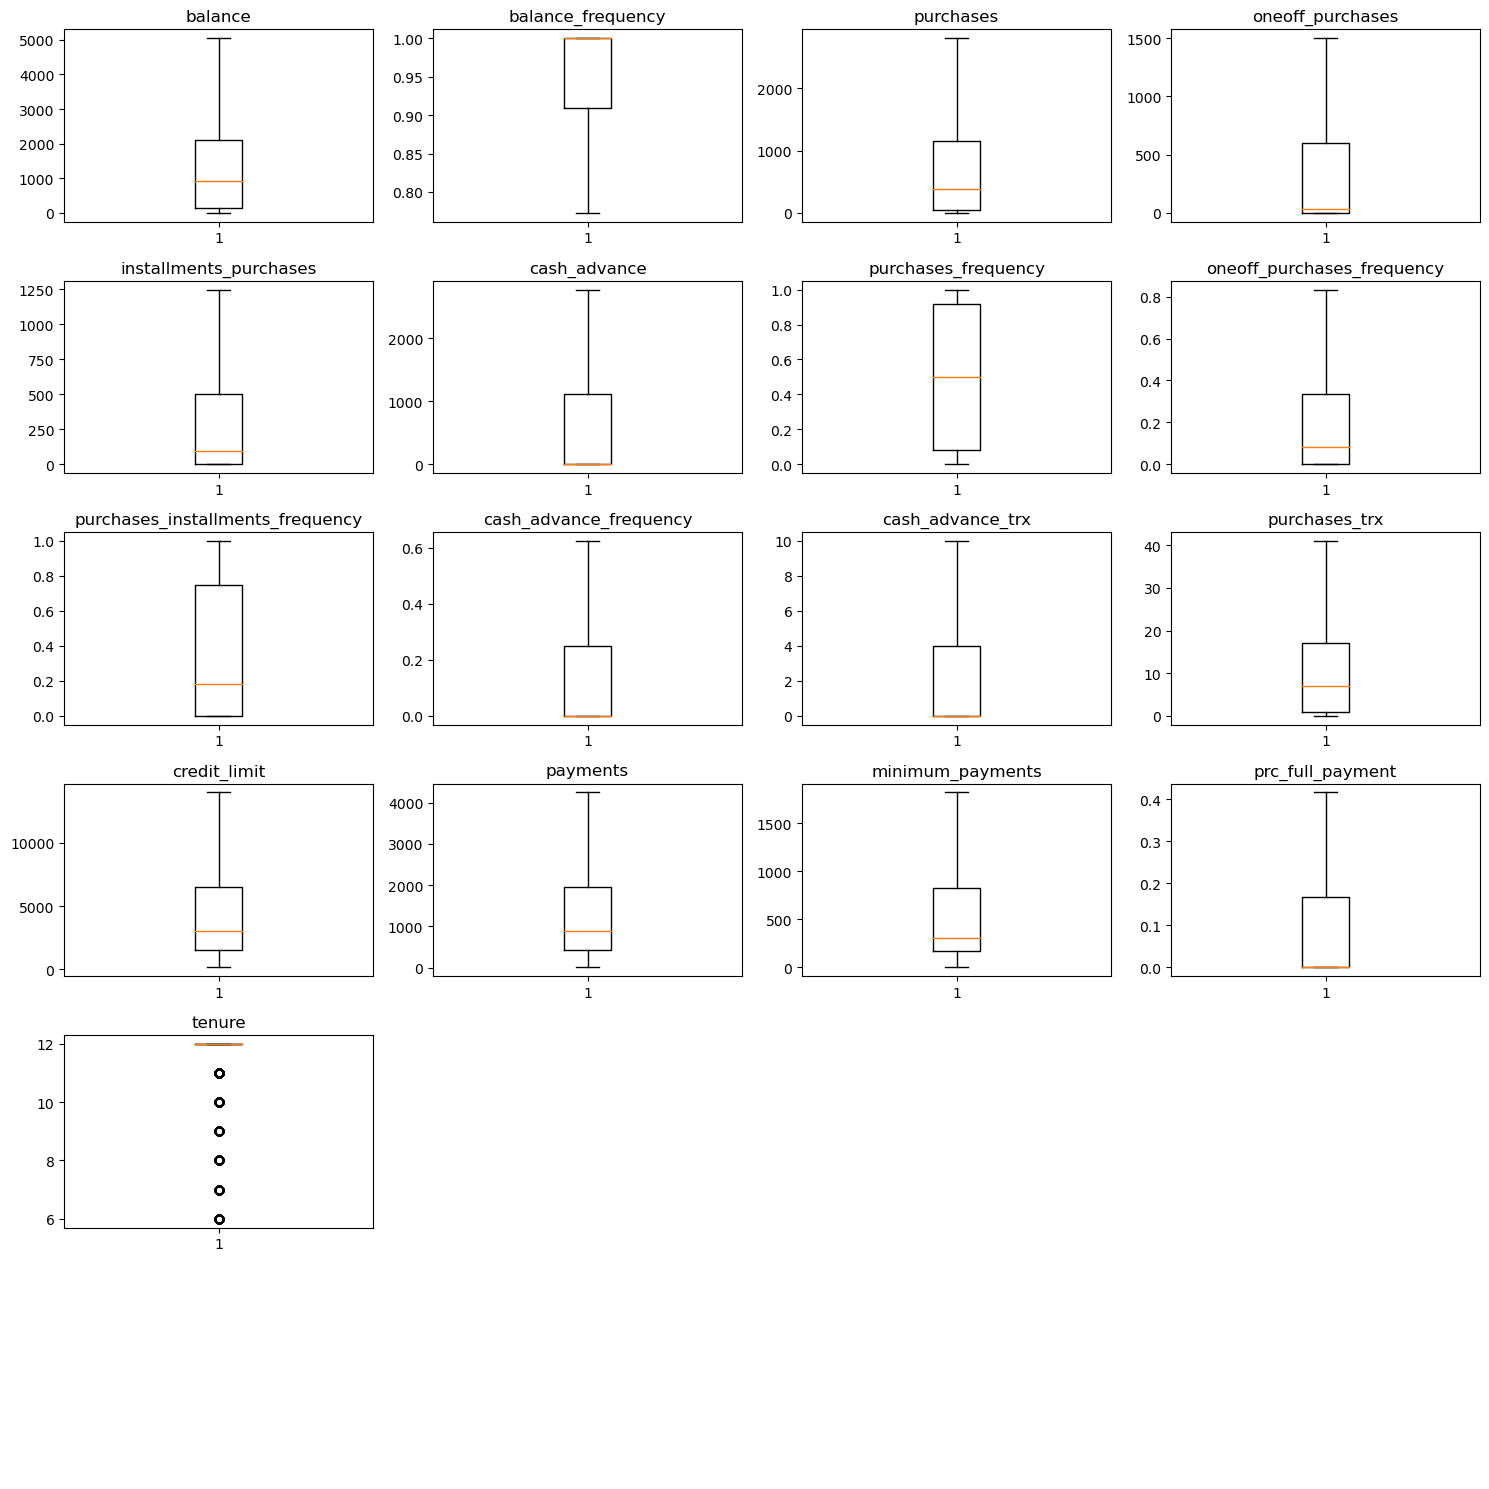

In [36]:
# plot figure
fig, axes = plt.subplots(6, 4, figsize=(15, 15))
axes = axes.flatten()
# membuat boxplot
for i, column in enumerate(df_capped.columns):
    axes[i].boxplot(df_capped[column])
    axes[i].set_title(column)

# hapus plot kosong
for j in range(len(df_capped.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
# show plot
plt.show()

#### Scaling Data

In [37]:
# Feature scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_capped)

#### Demensionality Reduction

In [38]:
# fit df_scaled dengan pca untuk plot cumulative  variance
pca = PCA()
pca.fit(df_scaled)

PCA()

In [39]:
df_scaled

array([[0.18678169, 0.44999945, 0.03668279, ..., 0.22529924, 0.        ,
        0.33333333],
       [0.09134478, 1.        , 0.208344  , ..., 0.08324724, 0.        ,
        0.33333333],
       [0.20855821, 1.        , 0.5164082 , ..., 0.12466085, 0.        ,
        0.33333333],
       ...,
       [0.67035309, 1.        , 0.19978943, ..., 0.48634269, 0.        ,
        0.83333333],
       [0.95818202, 1.        , 0.56838024, ..., 1.        , 0.21818116,
        0.83333333],
       [0.39134693, 1.        , 0.36755443, ..., 0.49987737, 0.21818116,
        0.83333333]])

Text(0, 0.5, 'Eigenvalues')

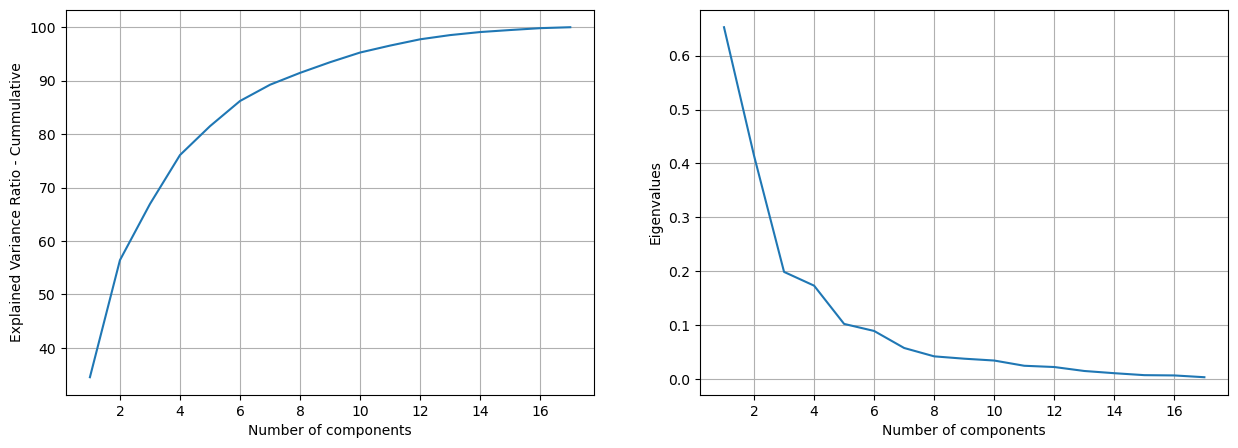

In [40]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 18), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

---
- plot dari Explained Variance Ratio Cummulative di ambang 95 untuk mendapatkan 10 komponen
- plot dari Eigenvalues adalah 2 di angka komponen 3 yang berpengaruh terhadap variance 

In [41]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
print('Features: ',num_features)

Features:  10


In [42]:
# Let's train the model with 95 % of the original dataset information

pca = PCA(n_components=0.95)
pca.fit(df_scaled)

df_scaled_pca = pca.transform(df_scaled)


# vii. Modeling

- Mencari Nilai Optimal dari n_components cluster

**Menggunakan Elbow Method**

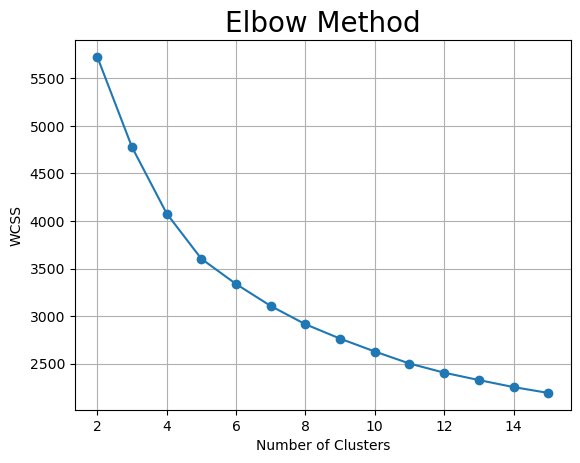

In [43]:
wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

---
**Kesimpulan**  
berdasarkan plot diatas, letak cluster pada nilai 5 yang melambat dalam penurunan


**Menggunakan Silhoutte Plot & Silhoutte Score**

Source : from Scikit-Learn

In [44]:
# Function to create Silhouette Plot

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.25216385275135517
For n_clusters = 3 The average silhouette_score is : 0.2118986746193148
For n_clusters = 4 The average silhouette_score is : 0.22335801668434005
For n_clusters = 5 The average silhouette_score is : 0.23312688155291586
For n_clusters = 6 The average silhouette_score is : 0.23284125121772298
For n_clusters = 7 The average silhouette_score is : 0.23814887557934297
For n_clusters = 8 The average silhouette_score is : 0.23372221483408326
For n_clusters = 9 The average silhouette_score is : 0.22795104209098507
For n_clusters = 10 The average silhouette_score is : 0.23138168538310225
For n_clusters = 11 The average silhouette_score is : 0.23209303826770736


For n_clusters = 12 The average silhouette_score is : 0.22895980040975053
For n_clusters = 13 The average silhouette_score is : 0.22942051399066327
For n_clusters = 14 The average silhouette_score is : 0.23221790917407611


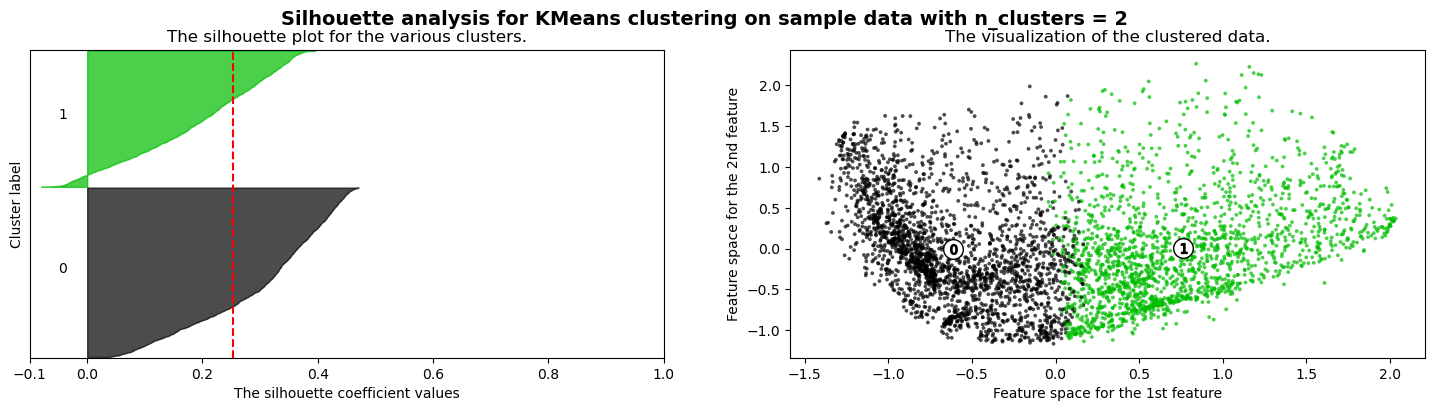

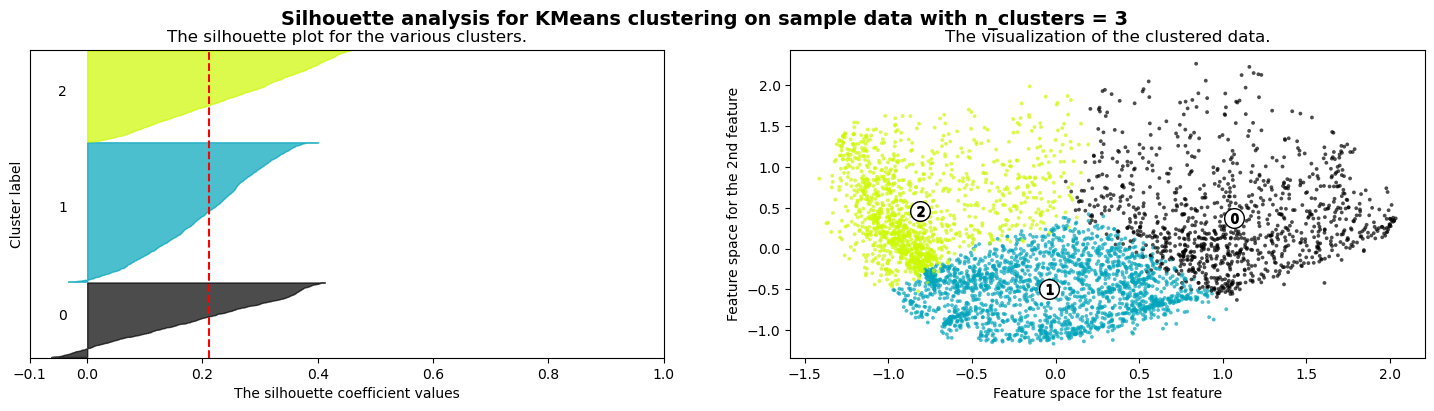

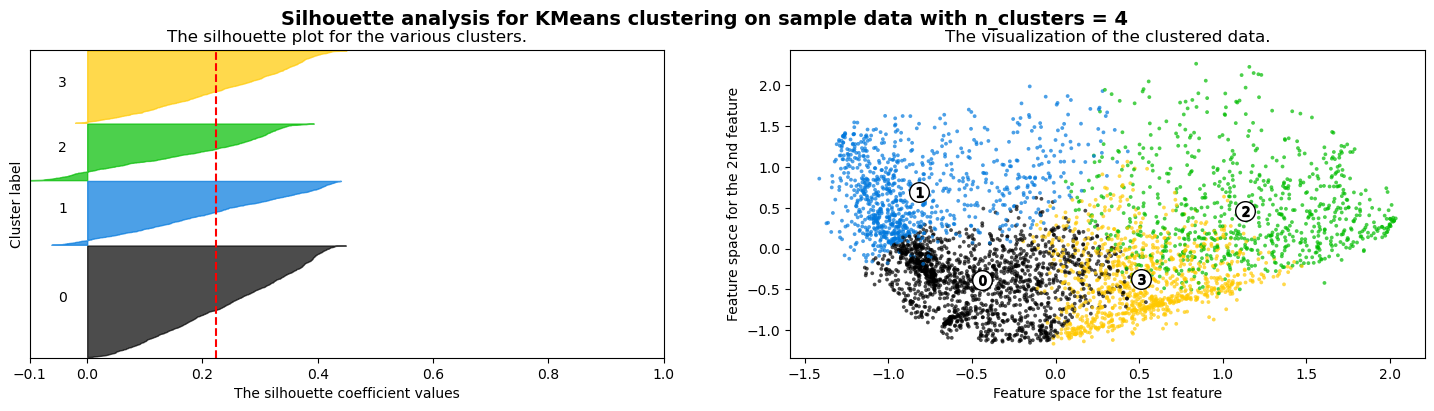

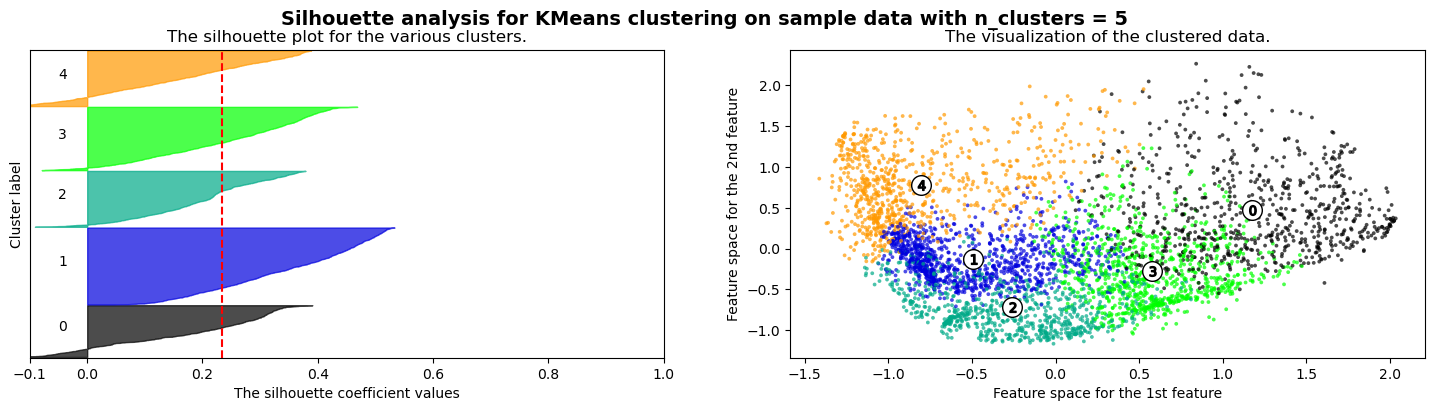

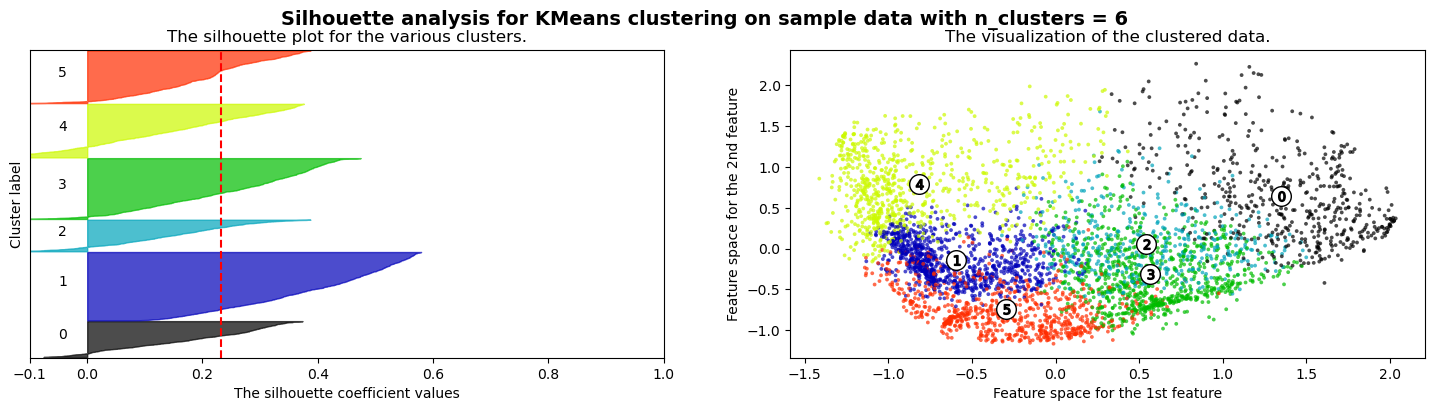

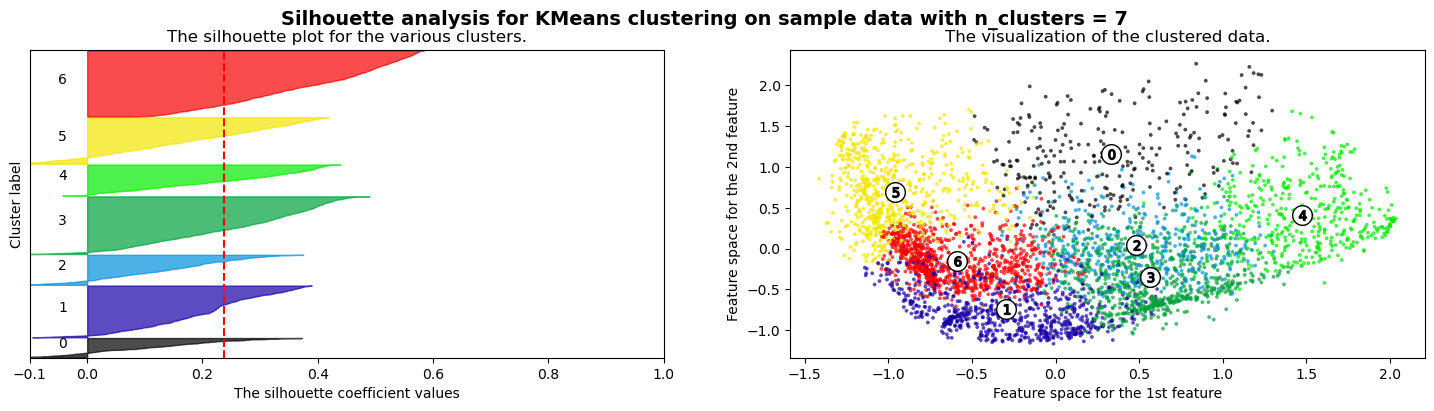

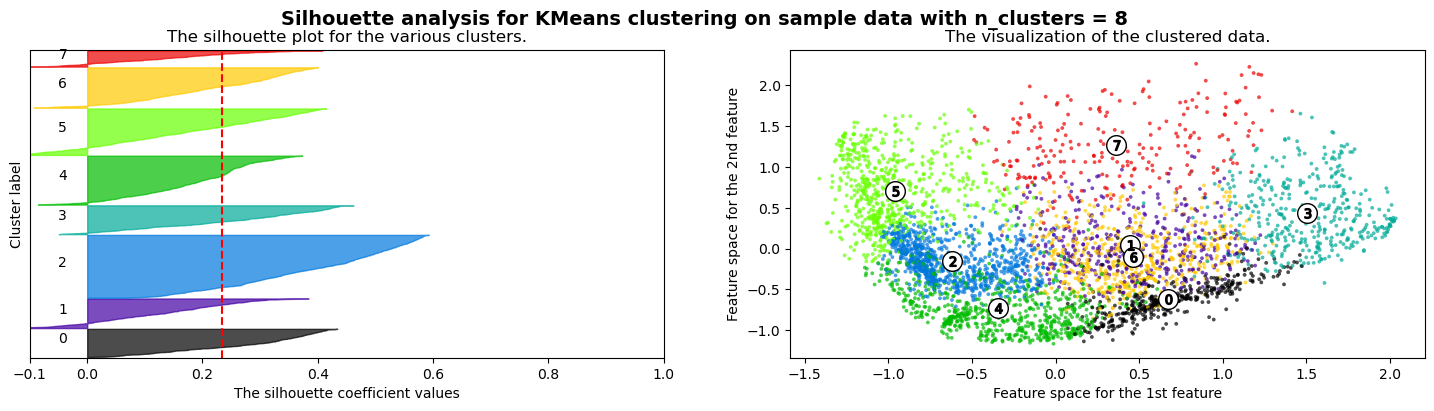

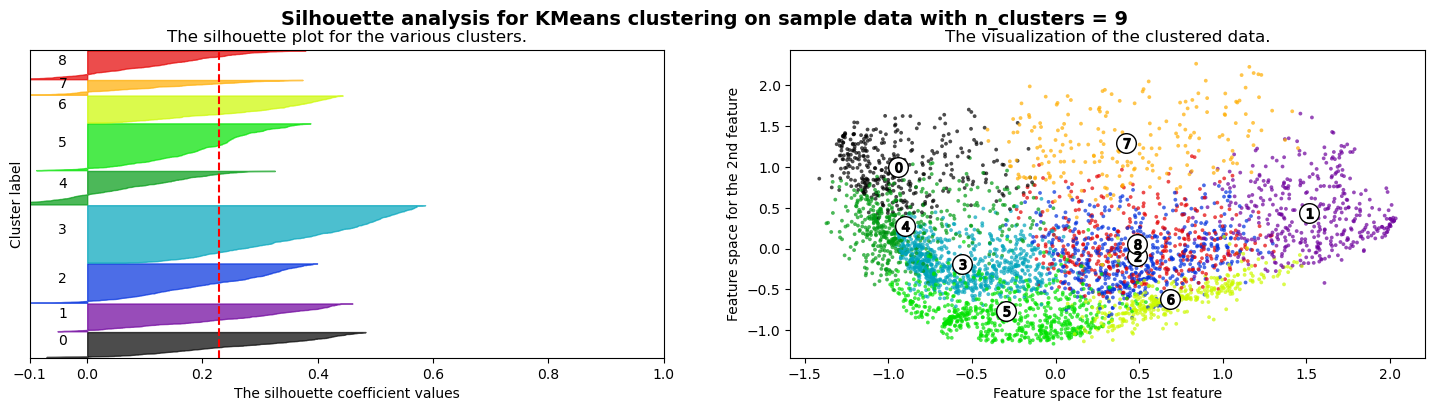

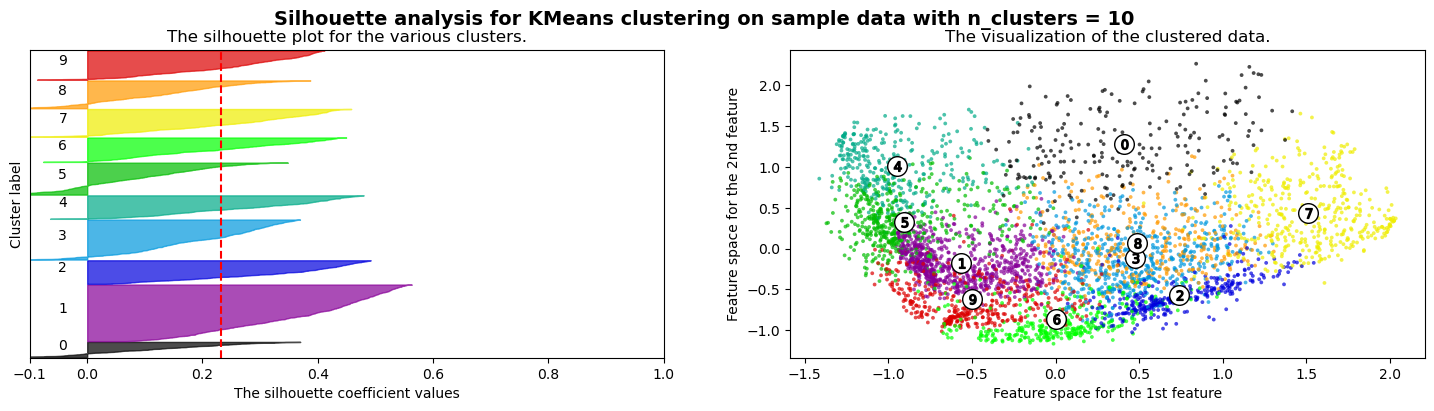

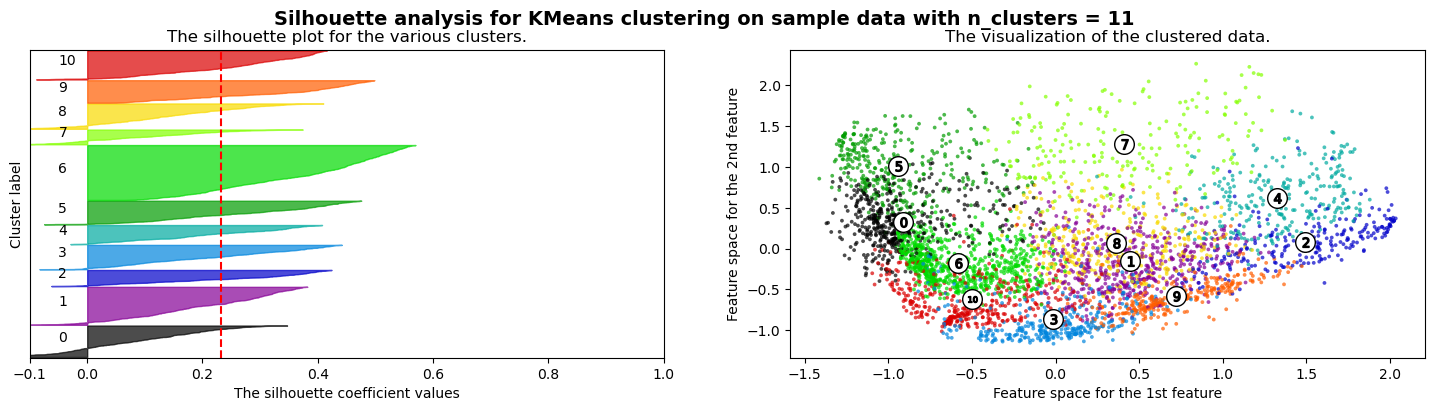

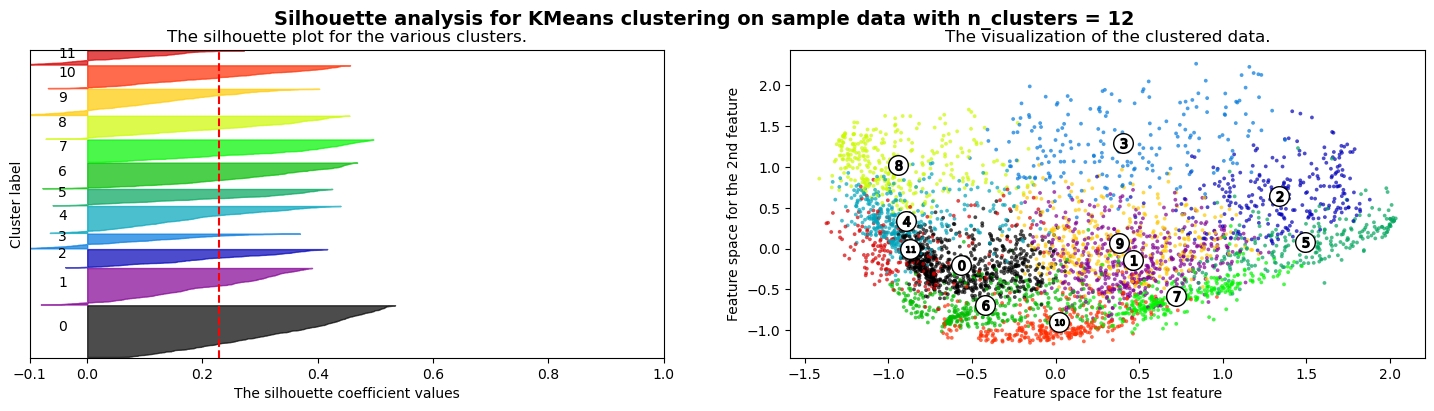

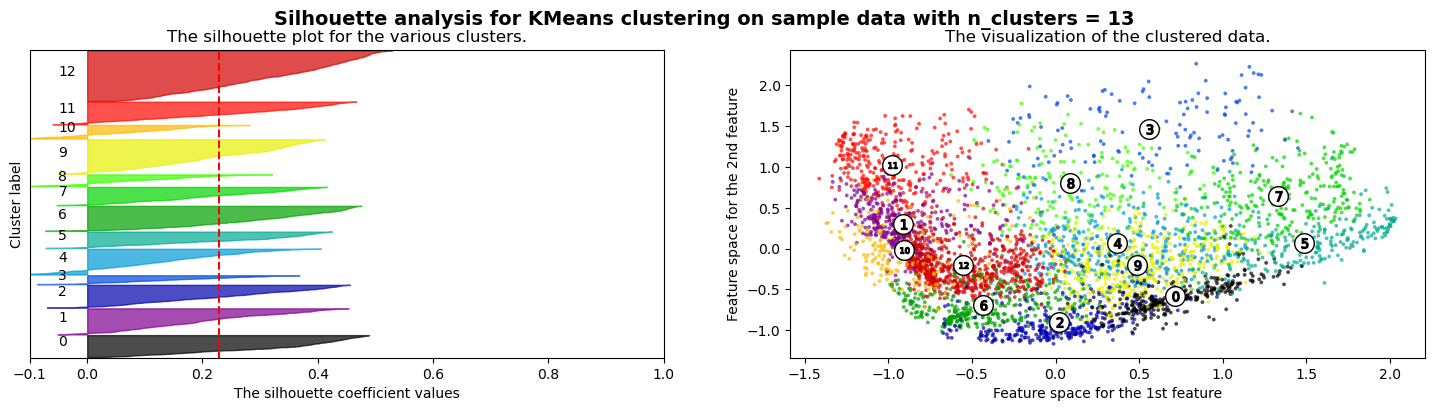

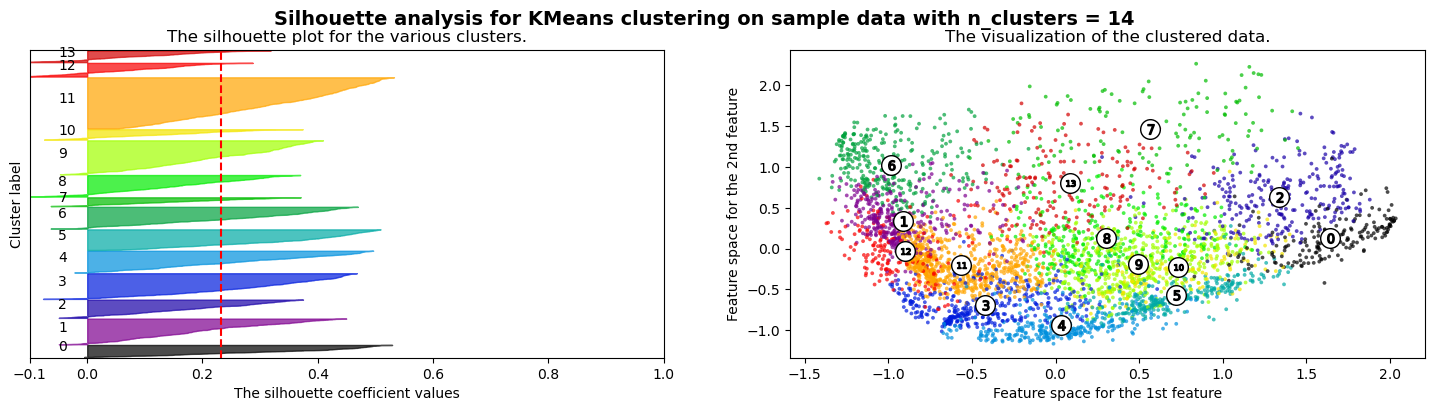

In [45]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), df_scaled_pca, random_state)

---
**Kesimpulan**

* Berdasarkan hasil plot sebaran cluster, nampaknya `n_cluster=3` yang memberikan visual yang baik.
* Oleh karena itu, dapat disimpulkan bahwa berdasarkan Silhouette Plot, jumlah cluster yang optimal adalah `n_clusters=3`.

Dari sini saya menggunakan `n_cluster=3` karena memilki plot yang jelas di bandingkan elbow method

#### Model Train & Predict

In [46]:
# Train with optimal number of clusters

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(df_scaled_pca)
pred

array([1, 1, 1, ..., 2, 2, 2])

In [47]:
# Insert clustering result into original dataset

df['cluster'] = pred
df

balance  balance_frequency  purchases  oneoff_purchases  \
1      943.584041           0.875000     103.00            103.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
5     2237.238086           1.000000     120.00            120.00   
7      424.994385           0.375000    1200.00           1200.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1595.93   
4474  1977.007090           1.000000    1032.04            226.90   

      installments_purchases  cash_advance  purchases_frequency  \
1                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
5                       0.00      0.000000             0.125000   
7                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      oneoff_purchases_frequency  purchases_installments_frequency  \
1                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
5                       0.125000                          0.000000   
7                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
1                   0.000000                 0              1        1000.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
5                   0.000000                 0              1        2500.0   
7                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         payments  minimum_payments  prc_full_payment  tenure  cluster  
1      215.325023        410.484825          0.000000       8        1  
3      258.032630        151.696433          0.000000       8        1  
4      397.090516        227.143184          0.000000       8        1  
5      343.102984        712.986387          0.000000       8        1  
7       57.266292         56.720210          0.000000       8        1  
...           ...               ...               ...     ...      ...  
4470  1379.635287        271.364415          0.090909      11        2  
44

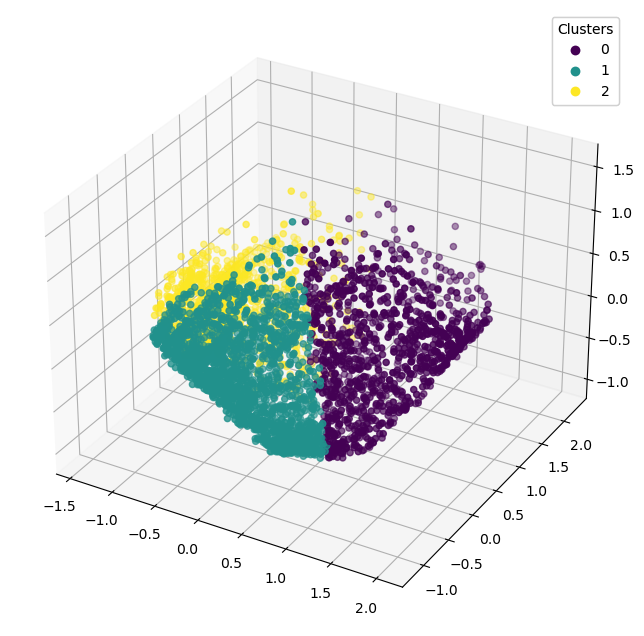

In [48]:

# Membuat dimensi jadi 3D
pca_3d = PCA(n_components=3)
pca_3d.fit(df_scaled)
df_scaled_pca_3d = pca_3d.transform(df_scaled)

#  plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatter plot
scatter = ax.scatter(df_scaled_pca_3d[:, 0], df_scaled_pca_3d[:, 1], df_scaled_pca_3d[:, 2],
                     c=df['cluster'], cmap='viridis')

# legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

plt.show()

# viii. Model Inference

In [49]:
# Model Saving
with open('scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('pca.pkl', 'wb') as file_2:
  pickle.dump(pca, file_2)

with open('model.pkl', 'wb') as file_3:
  pickle.dump(km, file_3)


In [50]:
# Load Model

with open("scaler.pkl", "rb") as file_1:
  scaler = pickle.load(file_1)

with open("pca.pkl", "rb") as file_2:
  pca = pickle.load(file_2)

with open("model.pkl", "rb") as file_3:
  model = pickle.load(file_3)

In [51]:
# Making a randomized dataset for inference

# Generate random data
num_samples = 150

random_data = {
    'balance': np.random.uniform(0, 10000, num_samples),
    'balance_frequency': np.random.uniform(0, 1, num_samples),
    'purchases': np.random.uniform(0, 10000, num_samples),
    'oneoff_purchases': np.random.uniform(0, 5000, num_samples),
    'installments_purchases': np.random.uniform(0, 5000, num_samples),
    'cash_advance': np.random.uniform(0, 5000, num_samples),
    'purchases_frequency': np.random.uniform(0, 1, num_samples),
    'oneoff_purchases_frequency': np.random.uniform(0, 1, num_samples),
    'purchases_installments_frequency': np.random.uniform(0, 1, num_samples),
    'cash_advance_frequency': np.random.uniform(0, 1, num_samples),
    'cash_advance_trx': np.random.randint(0, 100, num_samples),
    'purchases_trx': np.random.randint(0, 100, num_samples),
    'credit_limit': np.random.uniform(0, 20000, num_samples),
    'payments': np.random.uniform(0, 10000, num_samples),
    'minimum_payments': np.random.uniform(0, 1000, num_samples),
    'prc_full_payment': np.random.uniform(0, 1, num_samples),
    'tenure': np.random.randint(1, 12*10, num_samples)
}
# Convert to DataFrame
data_inf= pd.DataFrame(random_data)

# Display the DataFrame
data_inf.head()


balance  balance_frequency    purchases  oneoff_purchases  \
0  9203.088168           0.313661  9769.165277        869.535744   
1  2334.310043           0.293055  6974.015500       3337.417586   
2  1841.432258           0.035522  9514.443259       4187.543718   
3  1501.691159           0.657478  8001.284611       3541.911251   
4  9325.662470           0.586527  5802.141741       4995.504697   

   installments_purchases  cash_advance  purchases_frequency  \
0             4614.707923   3983.185888             0.510268   
1              437.098259    925.043589             0.227401   
2             2658.635532   3942.812184             0.658622   
3             4198.944683   4444.356617             0.643623   
4             4909.038731   2378.166187             0.978080   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.414095                          0.906382   
1                    0.076840                          0.305305   
2                    0.126466                          0.696250   
3                    0.953769                          0.486217   
4                    0.016078                          0.196386   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.929025                28             40  13414.120967   
1                0.902693                74              5  16146.846774   
2                0.397019                79             49   9366.927596   
3                0.520376                17             90  12309.226660   
4                0.655417                10             69  11580.423993   

      payments  minimum_payments  prc_full_payment  tenure  
0  3470.001658        126.430497          0.757341      34  
1   710.790662        614.124005          0.889038      43  
2  4212.145427        317.502655          0.934197       1  
3  2872.911711        756.423657          0.765707      23  
4  9837.113106        480.835758          0.000531      62

In [52]:
# Scaling
data_scaled = scaler.transform(data_inf)

# PCA 
data_scaled_pca = pca.transform(data_scaled)
data_scaled_pca

array([[ 2.03041831,  2.32468477,  1.50210209, ..., -1.85549921,
        -1.90391098, -3.50677805],
       [-0.29086285,  2.6382454 ,  2.79028164, ..., -4.2469391 ,
        -3.85168117, -4.27755219],
       [ 1.00897244,  2.92218954,  3.59976217, ...,  1.39530151,
        -1.8824494 , -2.71904398],
       ...,
       [ 0.58827932,  3.53029409,  2.95509488, ..., -2.41089455,
        -3.10474272, -2.78555833],
       [ 2.21986306,  2.94114299,  2.65964888, ..., -3.36972947,
        -2.50966478, -2.67840627],
       [ 0.71252025,  3.77872321,  0.11598163, ..., -6.79852718,
        -4.59453014, -4.3917007 ]])

In [53]:
# Predict
km_pred_inference = model.fit_predict(data_scaled_pca)
km_pred_inference

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       1, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 1, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 2,
       2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0,
       1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 0, 2, 1,
       0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1, 1, 0])

In [54]:
# Insert clustering result into inferennce dataset

data_inf['cluster'] = km_pred_inference
data_inf

balance  balance_frequency    purchases  oneoff_purchases  \
0    9203.088168           0.313661  9769.165277        869.535744   
1    2334.310043           0.293055  6974.015500       3337.417586   
2    1841.432258           0.035522  9514.443259       4187.543718   
3    1501.691159           0.657478  8001.284611       3541.911251   
4    9325.662470           0.586527  5802.141741       4995.504697   
..           ...                ...          ...               ...   
145  3588.160462           0.733461  4888.836238       2090.654819   
146  4523.562459           0.499777  8279.993451       1304.553897   
147  1452.078448           0.465789  4966.037190       4689.568090   
148  4210.726455           0.786587  8043.518473       4829.863569   
149  8400.023923           0.925966  3521.002035       2001.483317   

     installments_purchases  cash_advance  purchases_frequency  \
0               4614.707923   3983.185888             0.510268   
1                437.098259    925.043589             0.227401   
2               2658.635532   3942.812184             0.658622   
3               4198.944683   4444.356617             0.643623   
4               4909.038731   2378.166187             0.978080   
..                      ...           ...                  ...   
145             4576.514116   1881.925803             0.765524   
146             1560.744195   3844.252602             0.881432   
147              527.406594   1445.595375             0.404466   
148              897.022913    545.736556             0.685932   
149             2812.294693    528.142787             0.385735   

     oneoff_purchases_frequency  purchases_installments_frequency  \
0                      0.414095                          0.906382   
1                      0.076840                          0.305305   
2                      0.126466                          0.696250   
3                      0.953769                          0.486217   
4                      0.016078                          0.196386   
..                          ...                               ...   
145                    0.656334                          0.461640   
146                    0.227056                          0.645169   
147                    0.831656                          0.687291   
148                    0.707917                          0.351060   
149                    0.823036                          0.673680   

     cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                  0.929025                28             40  13414.120967   
1                  0.902693                74              5  16146.846774   
2                  0.397019                79             49   9366.927596   
3                  0.520376                17             90  12309.226660   
4                  0.655417                10             69  11580.423993   
..                      ...               ...            ...           ...   
145                0.826507                66             80   6001.512442   
146                0.119605                28             89  16884.498075   
147                0.887254                78             83   6560.445070   
148                0.977801                30             71  17036.226902   
149                0.183638                67             32   4192.856004   

        payments  minimum_payments  prc_full_payment  tenure  cluster  
0    3470.001658        126.430497          0.757341      34        1  
1     710.790662        614.124005          0.889038      43        0  
2    4212.145427        317.502655          0.934197       1        1  
3    2872.911711        756.423657          0.765707      23        1  
4    9837.113106        480.835758          0.000531      62        0  
..           ...               ...               ...     ...      ...  
145  1702.059658        657.644425          0.257178       1        1  
146  3569.329340         61.36168

<Axes: >

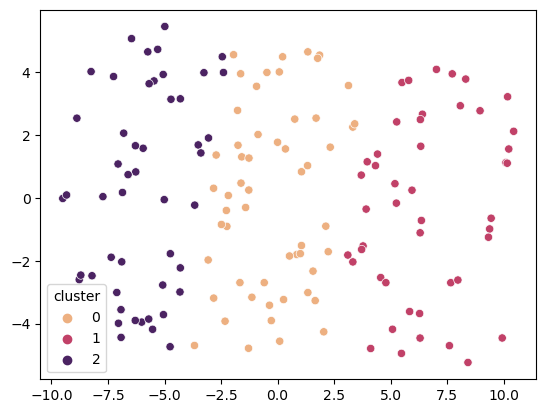

In [55]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(data_scaled)

sales_scaled_pca_2d = pca_2d.fit_transform(data_scaled)

sns.scatterplot(x=sales_scaled_pca_2d[:,0], y=sales_scaled_pca_2d[:,1], hue=data_inf['cluster'], palette='flare')

# ix. Exploratory Data Analysis (EDA) Cluster

In [1]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(df_scaled)

df_scaled_pca_2d = pca_2d.fit_transform(df_scaled)

sns.scatterplot(x=df_scaled_pca_2d[:,0], y=df_scaled_pca_2d[:,1], hue=df['cluster'], palette='magma')

NameError: name 'PCA' is not defined

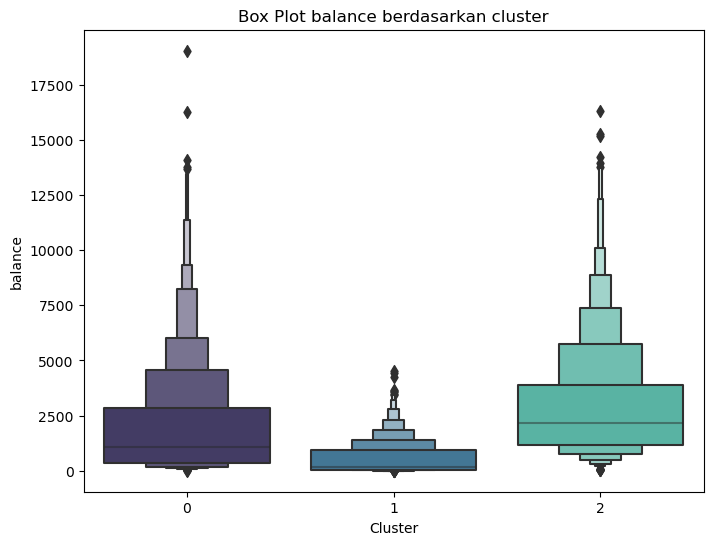

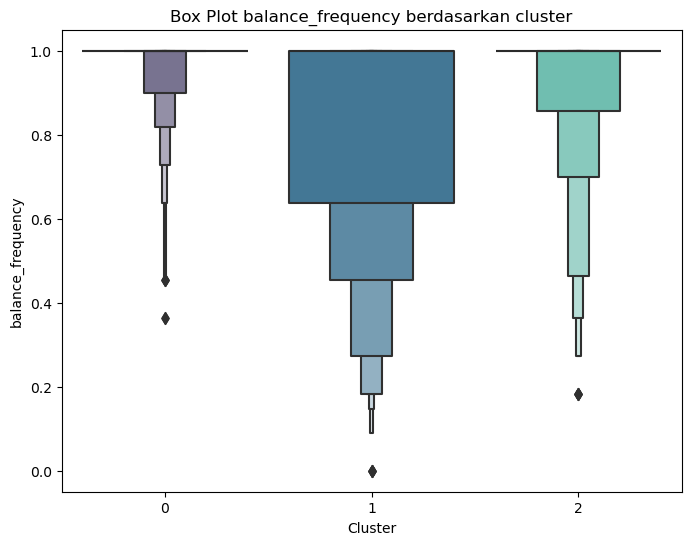

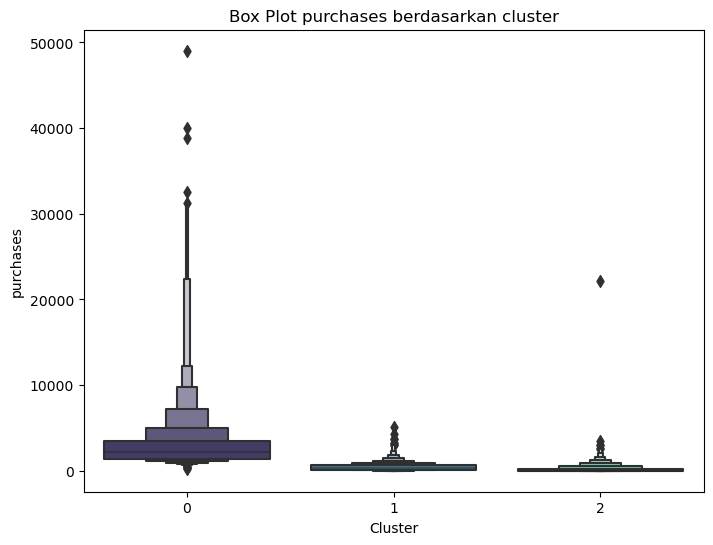

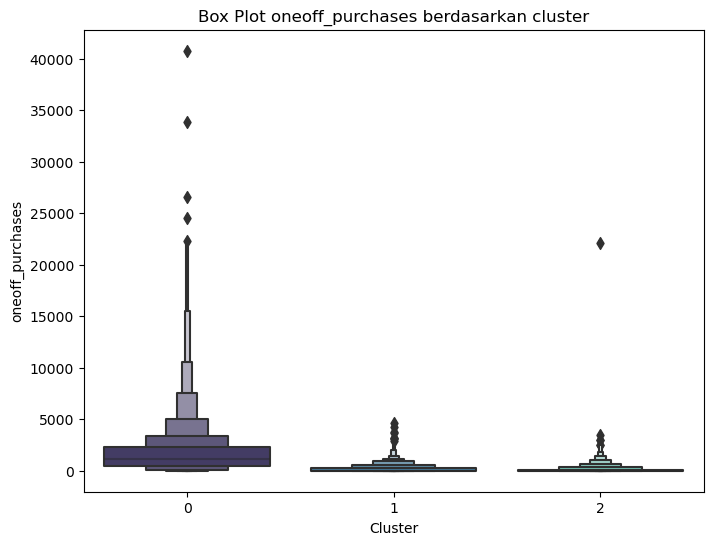

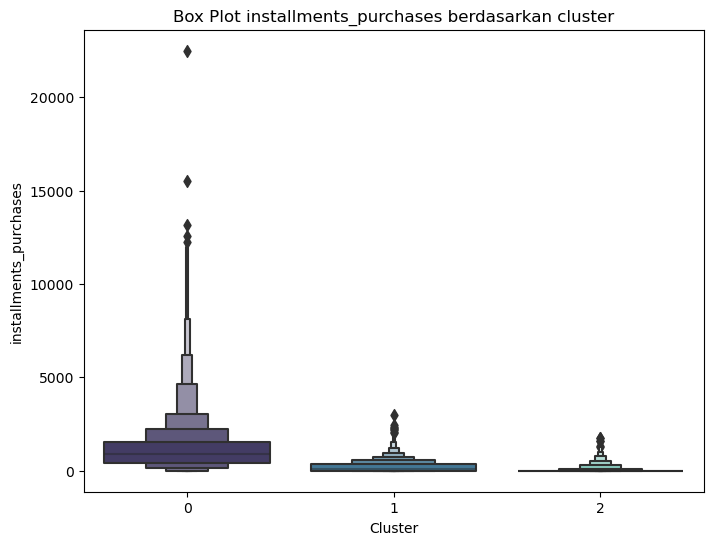

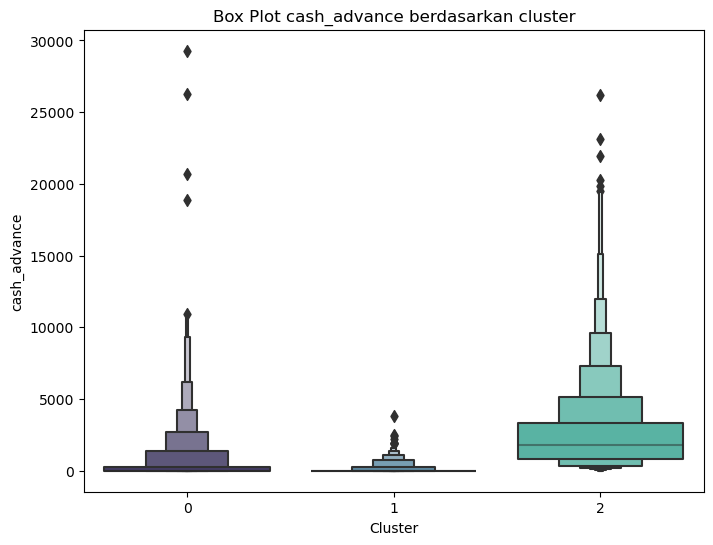

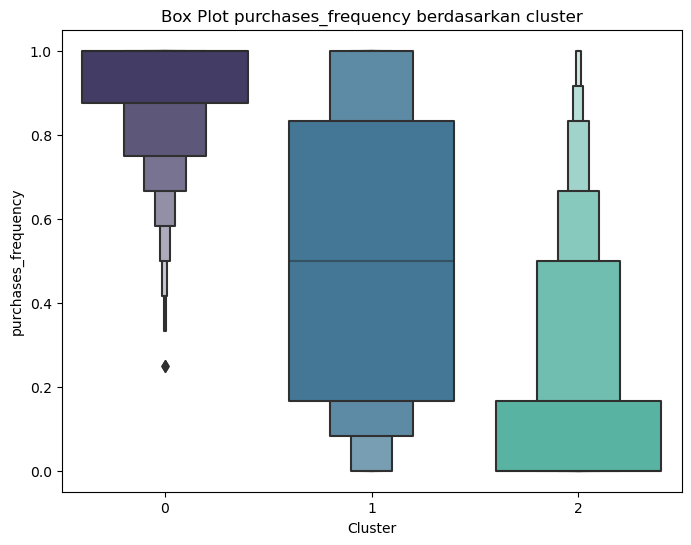

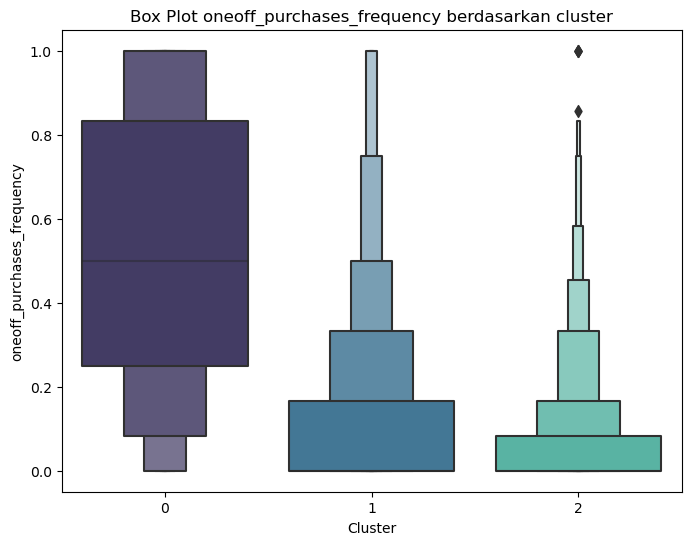

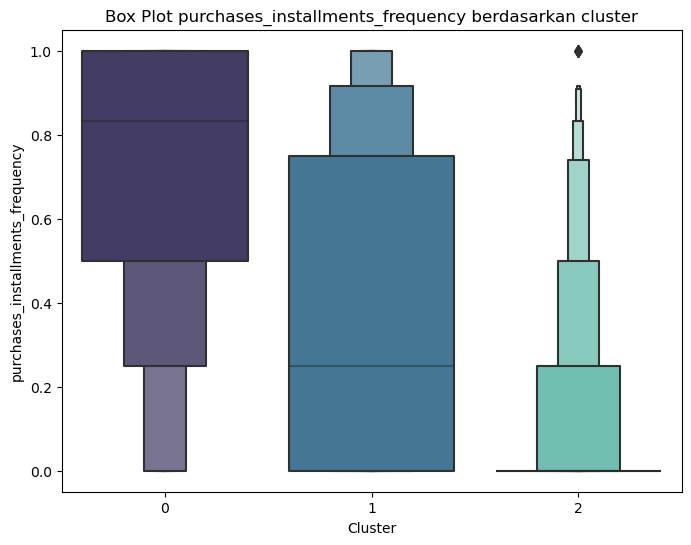

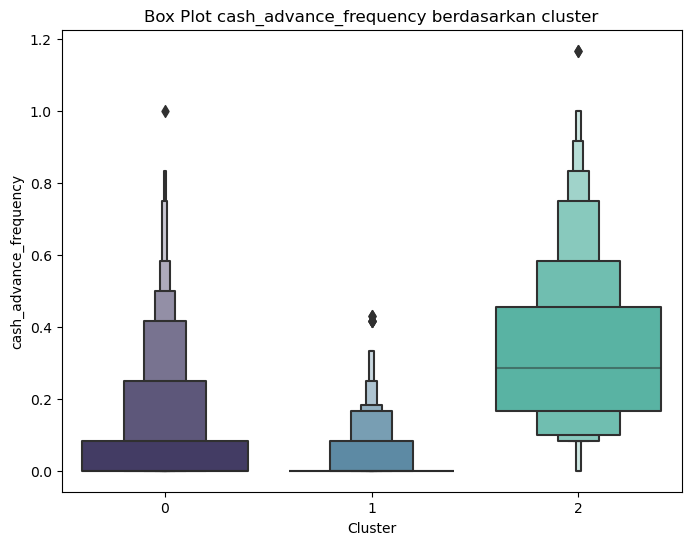

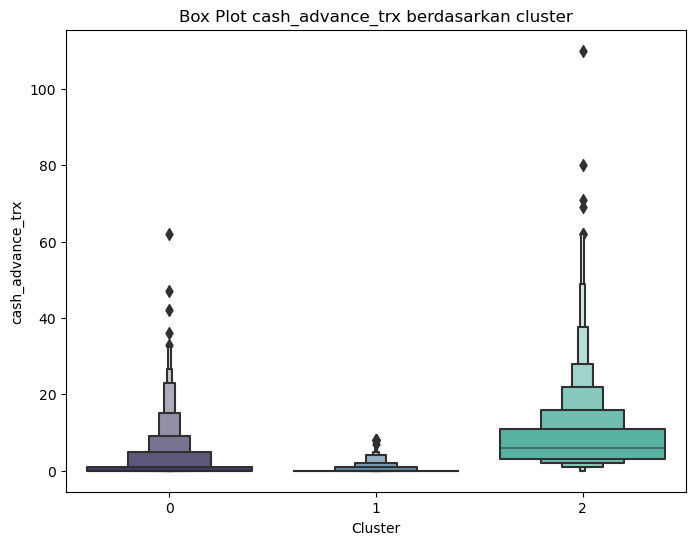

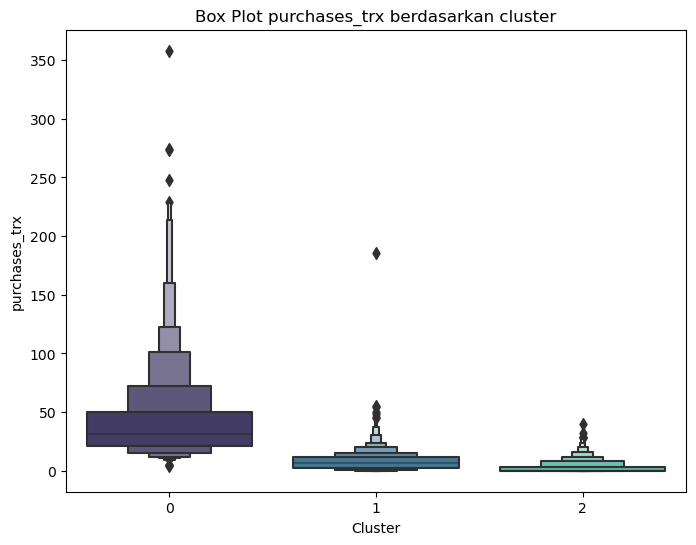

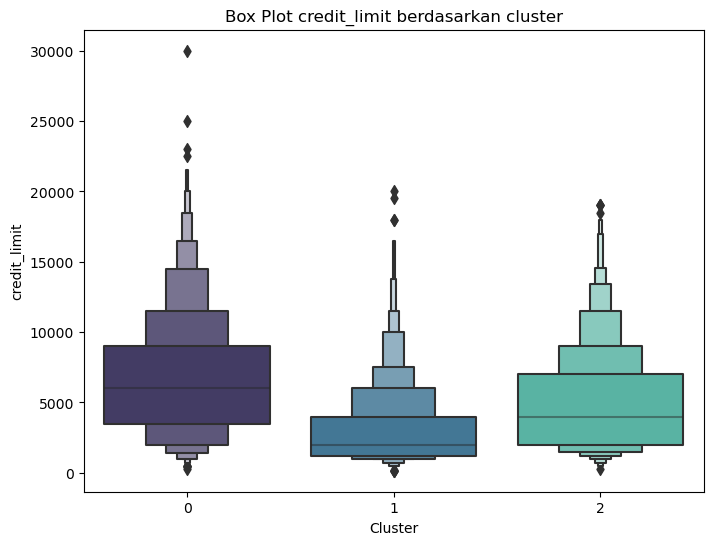

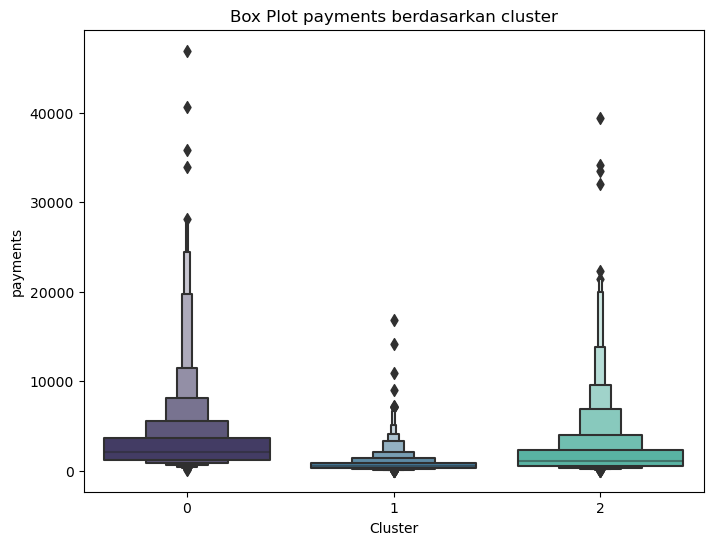

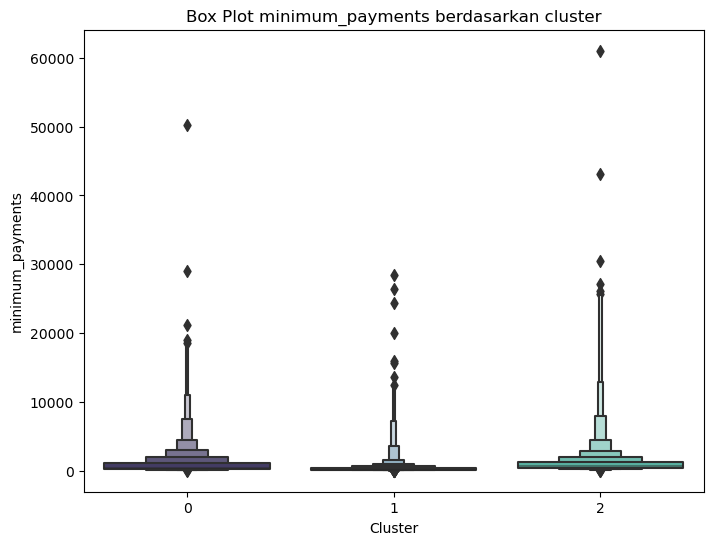

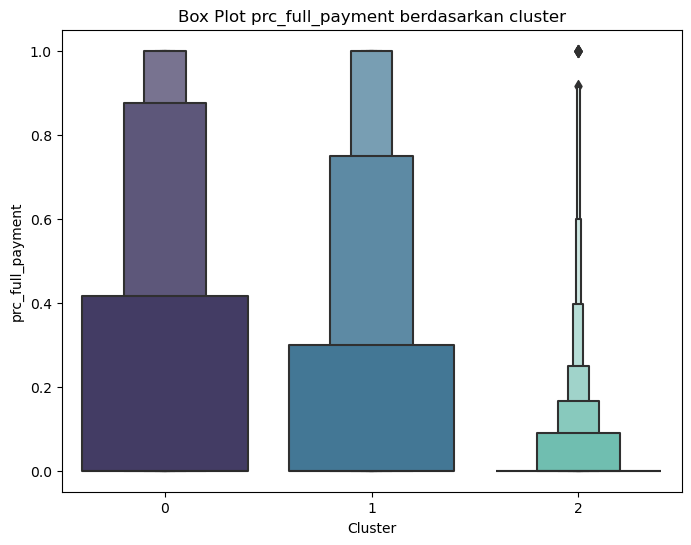

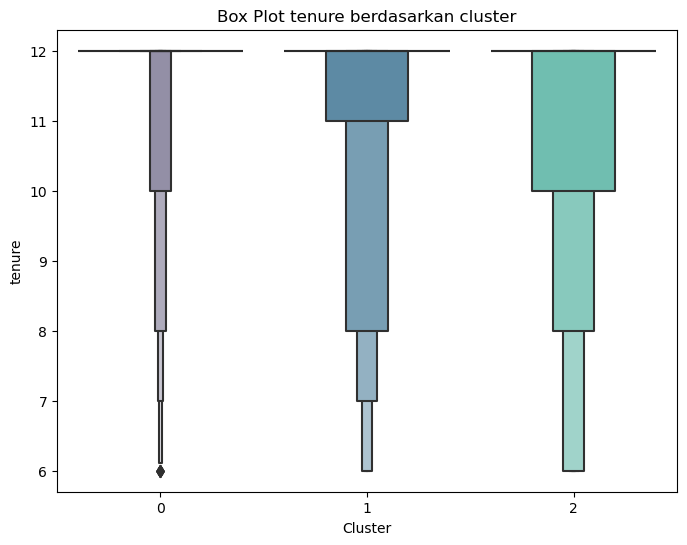

In [57]:
# Distribusi setelah cluster
cluster_col = 'cluster'

for col in df.columns:
    if col != cluster_col:
        plt.figure(figsize=(8,6))
        sns.boxenplot(x=cluster_col, y=col, data=df, palette='mako')
        plt.title(f'Box Plot {col} berdasarkan cluster')
        plt.xlabel('Cluster')
        plt.ylabel(col)
        plt.show()

---
extract info:
- balance cluster 1 < 0 < 2 
- balance_freq 0 < 2 < 1 terdistribusi di 1 frequently update
- purchases 2 < 1 < 0
- oneoff_purchases 2 < 1 < 0
- installments_purchases 2 < 1 < 0
- cash_advance 1 < 0 < 2
- purchases_frequency 0 < 2 < 1 distribusi cluster  0 = 1, 1 merata, 2 = 0
- oneoff_pruchases_freq 2 < 1 < 0 distribusi cluster 0 = merata, 1 dan 2 lebih dominan di 0
- purchases_installments_freq 2 < 0 < 1 distribusi cluster 0 = 1, 1 = 0 - 8, 2 = 0
- cash_advance_freq 1 < 0 < 2 distribusi cluster 0 = 0, 1 = 0, 2 = 2 - 5
- cash_advance_trx 1 < 0 < 2 distribusi cluster 0 = 0 , 1 = 0, 2 = 0-20
- purchases trx 2 < 1 < 0 distribusi cluster 0 = 0-50, 1 = 0, 2 = 0
- credit_limit 1 < 2 < 0 
- payments 1 < 2 < 0 
- min_payments 1 < 0 < 2
- prc_full_pay 2 < 1 < 0 
- tenure 0 < 1 < 2

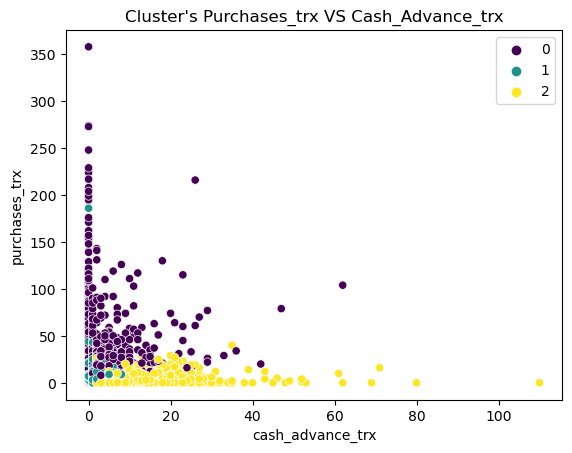

In [58]:
sns.scatterplot(data = df,x=df["cash_advance_trx"], y=df["purchases_trx"],hue=df["cluster"], palette='viridis').set_title("Cluster's Purchases_trx VS Cash_Advance_trx")
plt.legend()
plt.show()

*note*  :
purchases_trx vs cash_advance_trx
- group 0: dominan dari plot, cenderung transaksi pembelian tinggi dibanding cash advance transaksi
- group 1: cenderung rendah dalam transaksi
- group 2: kecenderungan cash advance transaction dan purchases trx rendah

#### Grouping data dengan cluster

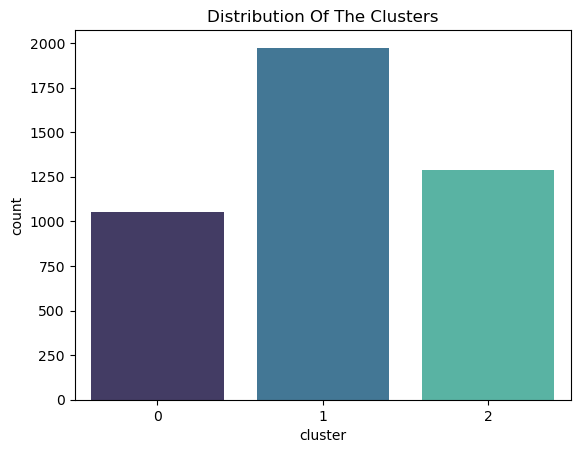

In [59]:
sns.countplot(x=df['cluster'], palette='mako').set_title('Distribution Of The Clusters')
plt.show()

In [60]:
cluster = df['cluster'].value_counts().sort_values(ascending=False)
cluster

cluster
1    1973
2    1288
0    1055
Name: count, dtype: int64

*Insight*  
Distribusi data 0 < 2 < 1

In [61]:
agg_mean =  df.groupby(['cluster'])[['purchases', 'balance', 'payments']].agg('mean').sort_values(by=['purchases', 'balance', 'payments'], ascending=False).reset_index()

agg_mean


cluster    purchases      balance     payments
0        0  3107.560417  2005.794234  3204.094388
1        1   444.741404   542.631818   791.583777
2        2   208.953261  2887.708646  2147.053871

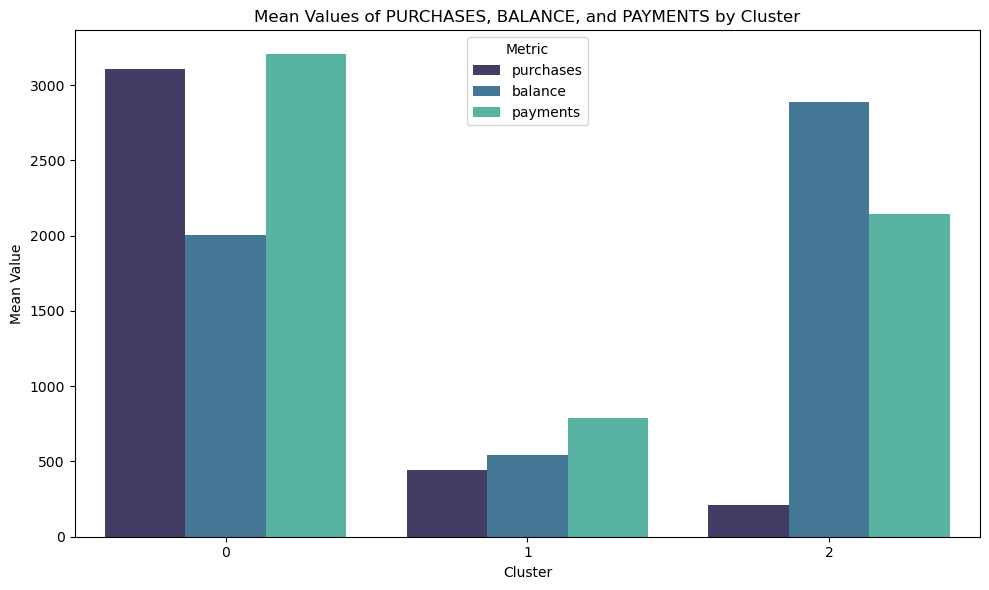

In [62]:
# Menggabungkan kolom 'cluster' dengan metrik
agg_mean_melted = agg_mean.melt(id_vars='cluster', var_name='Metric', value_name='Mean Value')

# Mengatur ukuran plot
plt.figure(figsize=(10, 6))

# Membuat bar plot menggunakan seaborn
sns.barplot(x='cluster', y='Mean Value', hue='Metric', data=agg_mean_melted, palette='mako')


# Menambahkan judul dan label
plt.title('Mean Values of PURCHASES, BALANCE, and PAYMENTS by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')


# Menampilkan plot
plt.tight_layout()
plt.show()

*Insight*  
Grouping berdasarkan rata-rata dari Purchases, Balance, dan Payments
- group 0: dengan penggunaan cc tinggi dari pembelian,pembayaran,dan saldo
- group 1: dengan penggunaan cc rendah dari pembelian,pembayaran,dan saldo
- group 2: unik dengan saldo rata-rata tinggi, dan pembelian yang rendah

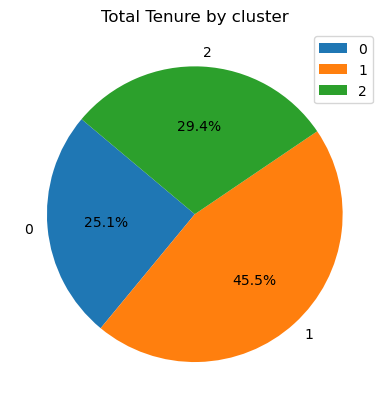

In [63]:
total_tenure_by_cluster = df.groupby('cluster')['tenure'].sum()

plt.figure()
plt.pie(total_tenure_by_cluster, labels=total_tenure_by_cluster.index, autopct='%1.1f%%', startangle=140)
plt.legend()
plt.title("Total Tenure by cluster")
plt.show()

*note*  
Bedasarkan total tenure dari cluster 1 memilki jumlah tertinggi

<Axes: xlabel='tenure', ylabel='count'>

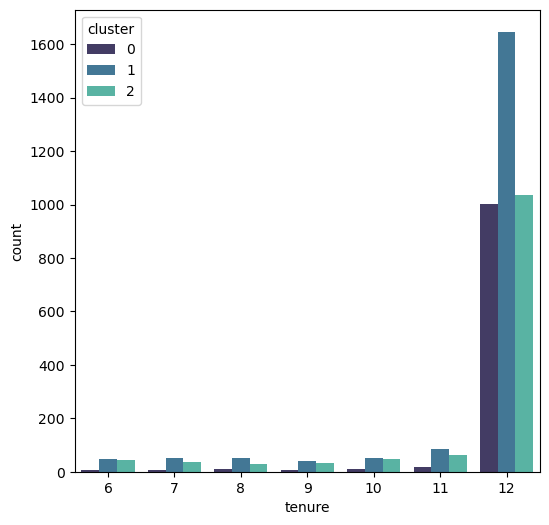

In [64]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['tenure'], data=df, hue=df['cluster'], palette='mako')

*Insight*
- Dari hasil cluster kecenderungan customer berada bulan 12 sama halnya sebelum clustering
- dari grouping cluster, cluster 0 < 2 < 1 untuk bulan 12 


In [65]:
min_pay_byTenure_min = df.groupby('tenure')['minimum_payments'].min()
min_pay_byTenure_max = df.groupby('tenure')['minimum_payments'].max()
print('Min Payments by tenure min')
print(min_pay_byTenure_min)
print('')
print('Min Payments by tenure max')
print(min_pay_byTenure_max)

Min Payments by tenure min
tenure
6      7.221665
7      1.519351
8      0.311953
9      1.334075
10    18.219526
11    46.022249
12     0.037744
Name: minimum_payments, dtype: float64

Min Payments by tenure max
tenure
6      3142.889196
7      7243.733403
8      3905.740148
9     10057.561920
10     3422.988223
11    26378.907820
12    61031.618600
Name: minimum_payments, dtype: float64


<Axes: xlabel='tenure', ylabel='minimum_payments'>

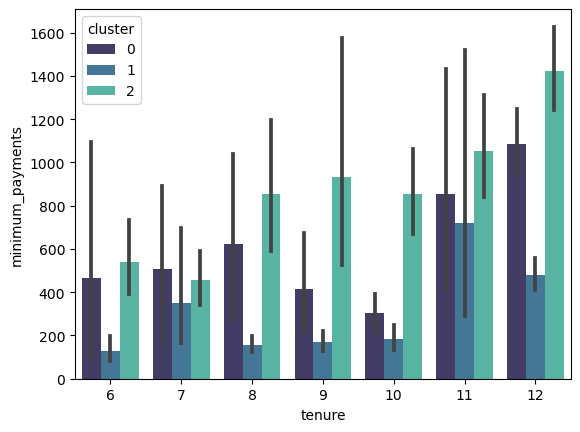

In [66]:
sns.barplot(data=df, x="tenure", y="minimum_payments", hue="cluster",palette='mako')

*note*
- group 0: trend memiliki kenaikan tinggi di bulan 12 dan penurunan di bulan 10
- group 1: trend kenaikan tinggi di bulan 11 dan distribusinya rendah dibandingkan dengan cluster lain
- group 2: tren kenaikan tinggi di bulan 12 dan terdistribusi naik 

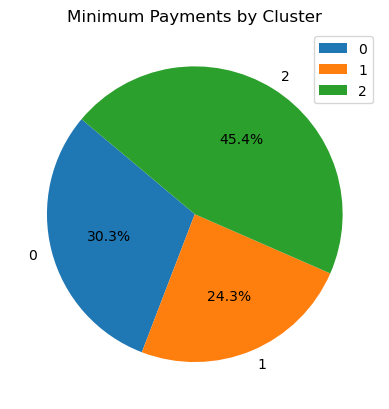

In [67]:
# kalkulasi total minimum payments per cluster
total_payments_per_cluster = df.groupby('cluster')['minimum_payments'].sum()

plt.figure()
plt.pie(total_payments_per_cluster, labels=total_payments_per_cluster.index, autopct='%1.1f%%', startangle=140)
plt.legend()
plt.title("Minimum Payments by Cluster")
plt.show()

*note*
proporsi data cluster berdasarkan minimum payments 2 > 0 > 1

#### Statistik cluster

In [68]:
data_cluster_0 = df[df['cluster'] == 0]
data_cluster_1 = df[df['cluster'] == 1]
data_cluster_2 = df[df['cluster'] == 2]

In [69]:
data_cluster_0.describe()

balance  balance_frequency     purchases  oneoff_purchases  \
count   1055.000000        1055.000000   1055.000000       1055.000000   
mean    2005.794234           0.980519   3107.560417       1865.833498   
std     2390.594418           0.069972   3706.954936       2938.025916   
min        6.793588           0.363636    242.880000          0.000000   
25%      337.789903           1.000000   1412.290000        428.855000   
50%     1096.991698           1.000000   2132.930000       1161.470000   
75%     2848.958806           1.000000   3455.335000       2286.715000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       installments_purchases  cash_advance  purchases_frequency  \
count             1055.000000   1055.000000          1055.000000   
mean              1241.818161    610.032214             0.916565   
std               1578.362579   1975.714193             0.139738   
min                  0.000000      0.000000             0.250000   
25%                400.770000      0.000000             0.875000   
50%                913.400000      0.000000             1.000000   
75%               1557.110000    282.787396             1.000000   
max              22500.000000  29282.109150             1.000000   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                 1055.000000                       1055.000000   
mean                     0.526827                          0.723716   
std                      0.348865                          0.328707   
min                      0.000000                          0.000000   
25%                      0.250000                          0.500000   
50%                      0.500000                          0.833333   
75%                      0.833333                          1.000000   
max                      1.000000                          1.000000   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count             1055.000000       1055.000000    1055.000000   1055.000000   
mean                 0.081203          1.983886      42.042654   6649.840586   
std                  0.157534          5.152395      35.870380   4280.797059   
min                  0.000000          0.000000       4.000000    300.000000   
25%                  0.000000          0.000000      21.000000   3500.000000   
50%                  0.000000          0.000000      31.000000   6000.000000   
75%                  0.083333          1.000000      50.000000   9000.000000   
max                  1.000000         62.000000     358.000000  30000.000000   

           payments  minimum_payments  prc_full_payment       tenure  cluster  
count   1055.000000       1055.000000       1055.000000  1055.000000   1055.0  
mean    3204.094388       1058.709597          0.239777    11.853081      0.0  
std     4083.561200       2506.569636          0.350682     0.738111      0.0  
min       92.865469         28.103306          0.000000     6.000000      0.0  
25%     1256.190388        188.893967          0.000000    12.000000      0.0  
50%     2045.152399        383.572166          0.000000    12.000000      0.0  
75%     3636.081390       1075.730898          0.416667    12.000000      0.0  
max    46930.598240      50260.759470          1.000000    12.000000      0.0

In [70]:
data_cluster_1.describe()

balance  balance_frequency    purchases  oneoff_purchases  \
count  1973.000000        1973.000000  1973.000000       1973.000000   
mean    542.631818           0.815335   444.741404        218.033659   
std     711.549764           0.257628   460.649702        423.492144   
min       0.000000           0.000000     0.000000          0.000000   
25%      37.759404           0.636364   121.200000          0.000000   
50%     165.290723           1.000000   327.940000          0.000000   
75%     927.294609           1.000000   622.510000        281.700000   
max    4539.839383           1.000000  5080.850000       4674.210000   

       installments_purchases  cash_advance  purchases_frequency  \
count             1973.000000   1973.000000          1973.000000   
mean               227.467856    117.586635             0.500001   
std                313.946180    323.732399             0.351773   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.166667   
50%                116.100000      0.000000             0.500000   
75%                345.000000      0.000000             0.833333   
max               3011.360000   3795.101004             1.000000   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                 1973.000000                       1973.000000   
mean                     0.124019                          0.371768   
std                      0.208191                          0.375800   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.250000   
75%                      0.166667                          0.750000   
max                      1.000000                          1.000000   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count             1973.000000       1973.000000    1973.000000   1973.000000   
mean                 0.031869          0.484541       8.216422   3116.429014   
std                  0.066071          1.094143       8.290815   2679.757416   
min                  0.000000          0.000000       0.000000    150.000000   
25%                  0.000000          0.000000       2.000000   1200.000000   
50%                  0.000000          0.000000       7.000000   2000.000000   
75%                  0.000000          0.000000      12.000000   4000.000000   
max                  0.428571          8.000000     186.000000  20000.000000   

           payments  minimum_payments  prc_full_payment       tenure  cluster  
count   1973.000000       1973.000000       1973.000000  1973.000000   1973.0  
mean     791.583777        453.768065          0.204843    11.467816      1.0  
std     1025.353543       1513.340615          0.328396     1.400740      0.0  
min        4.841543          0.037744          0.000000     6.000000      1.0  
25%      278.441988        125.684033          0.000000    12.000000      1.0  
50%      507.859879        177.102986          0.000000    12.000000      1.0  
75%      891.708605        344.758313          0.300000    12.000000      1.0  
max    16842.391870      28483.254830          1.000000    12.000000      1.0

In [71]:
data_cluster_2.describe()

balance  balance_frequency     purchases  oneoff_purchases  \
count   1288.000000        1288.000000   1288.000000       1288.000000   
mean    2887.708646           0.947775    208.953261        150.846630   
std     2434.092284           0.138085    729.416281        702.787751   
min       10.268192           0.181818      0.000000          0.000000   
25%     1163.494829           1.000000      0.000000          0.000000   
50%     2144.259111           1.000000      0.000000          0.000000   
75%     3905.913528           1.000000    212.052500         73.565000   
max    16304.889250           1.000000  22101.780000      22101.780000   

       installments_purchases  cash_advance  purchases_frequency  \
count             1288.000000   1288.000000          1288.000000   
mean                58.158610   2627.504737             0.144299   
std                183.857269   2881.689747             0.246718   
min                  0.000000      0.000000             0.000000   
25%                  0.000000    819.819399             0.000000   
50%                  0.000000   1804.348972             0.000000   
75%                  0.000000   3358.686682             0.166667   
max               1770.570000  26194.049540             1.000000   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                 1288.000000                       1288.000000   
mean                     0.066941                          0.076911   
std                      0.141878                          0.195593   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.083333                          0.000000   
max                      1.000000                          1.000000   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count             1288.000000       1288.000000    1288.000000   1288.000000   
mean                 0.341185          8.531832       2.576863   4940.333851   
std                  0.215790          8.971452       4.967993   3563.292432   
min                  0.000000          0.000000       0.000000    300.000000   
25%                  0.166667          3.000000       0.000000   2000.000000   
50%                  0.285714          6.000000       0.000000   4000.000000   
75%                  0.454545         11.000000       3.000000   7000.000000   
max                  1.166667        110.000000      40.000000  19000.000000   

           payments  minimum_payments  prc_full_payment       tenure  cluster  
count   1288.000000       1288.000000       1288.000000  1288.000000   1288.0  
mean    2147.053871       1301.502237          0.036006    11.365683      2.0  
std     3399.122427       2950.217233          0.107386     1.520327      0.0  
min       27.397306         16.950090          0.000000     6.000000      2.0  
25%      539.929136        385.312920          0.000000    12.000000      2.0  
50%     1086.456383        719.909576          0.000000    12.000000      2.0  
75%     2264.628916       1338.714699          0.000000    12.000000      2.0  
max    39461.965800      61031.618600          1.000000    12.000000      2.0

### Profiling 

**Cluster 0**
- distribusi kelompok minoritas
- Pengguanaa cc tinggi berdasarkan balance , purcahses, dan payments
- Berdasarkan trend secara signifikan naik di bulan 12 dan ada penurunan sebelumnay di bulan 10
- purchases_trx vs cash_advance_trx cenderung transaksi pembelian tinggi dibanding cash advance transaksi


**Cluster 1**
- Distribusi kelompok mayoritas
- Penggunaan cc rendah berdasarkan balance , purchases, dan payments
- Dari trend kenaikan tinggi di bulan 11 dan yang lain nya rendah
- Dalam purchases_trx vs cash_advance_trx cenderung rendah dalam transaksi



**Cluster 2**
- Distribusi kelompok sedang
- Penggunaan cc unik dengan balance rata-rata tinggi, dan pembelian yang rendah ,
- trend kenaikan tinggi di bulan 12 dan terdistribusi naik 
- kecenderungan cash advance transaction dari pada yang lain
- Dalam purchases_trx vs cash_advance_trx condong ke cash advance transaction dan purchases trx rendah




# x. Kesimpulan

Dari project ini dengan melakukan clustering mendapatkan 3 Segmen customer yang meggunakan dua metode yaitu elbow method dan silhoutte. , dan mendapatkan beberapa insight untuk bisnis. sebagai berikut:
- cluster 0 :
    - kelompok minoritas 
    - dengan asumsi keuangan yang stabil
    - Rekomendasi bisnis: berikan penawaran kartu kredit eksklusif 
- cluster 1 :
    - kelompok mayoritas
    - dengan asumsi tidak tertarik, keuangan tidak stabil dan sebagainya mungkin bisa diexplore lebih lanjut
    - Rekomendasi bisnis: berikan beberapa penawaran menarik, seperti Kartu Kredit Tanpa Biaya Tahunan, dan berikan penawaran discount dalam waktu tertentu
- cluster 2 :
    - kelompok sedang
    - dengan asumsi cenderung tidak melakukan banyak pembelian baru atau membayar secara penuh setiap bulan
    - Rekomendasi bisnis: kartu kredit dengan tingkat bunga rendah atau penawaran transfer saldo nol persen, dan mungkin berikan beberapa fitur menarik yang mempermudah transaksi
